# Module 2 Final Project	
Using multivariate linear regression (MLR)
to predict U.S. life expectancy

In [102]:
import numpy as np
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

import pickle


# Data Gathering
Source: County Health Rankings (https://www.countyhealthrankings.org)

Collaboration: RWJ & UoW

Break-down: 3,193 counties/50 states

Year: 2019

# Overview
For this project I investigated the relationship between life expectancy against health behaviors, clinical care access, socioeconomic factors, and physical environment.

Thus, is there a correlation between the aforementioned features and life expectancy?

# Viewing Data

In [103]:
df = pd.read_csv('county_health_rankings_dataset_2019.csv')
pd.set_option('display.max_columns', None) #In order to view all columns
df

State FIPS Code County FIPS Code 5-digit FIPS Code State Abbreviation  \
0          statecode       countycode          fipscode              state   
1                 00              000             00000                 US   
2                 01              000             01000                 AL   
3                 01              001             01001                 AL   
4                 01              003             01003                 AL   
...              ...              ...               ...                ...   
3190              56               37             56037                 WY   
3191              56               39             56039                 WY   
3192              56               41             56041                 WY   
3193              56               43             56043                 WY   
3194              56               45             56045                 WY   

                   Name Release Year County Ranked (Yes=1/No=0)  \
0                county         year              county_ranked   
1         United States         2019                        NaN   
2               Alabama         2019                        NaN   
3        Autauga County         2019                          1   
4        Baldwin County         2019                          1   
...                 ...          ...                        ...   
3190  Sweetwater County         2019                          1   
3191       Teton County         2019                          1   
3192       Uinta County         2019                          1   
3193    Washakie County         2019                          1   
3194      Weston County         2019                          1   

     Premature death raw value Premature death numerator  \
0                v001_rawvalue            v001_numerator   
1                  6900.630354                   3745538   
2                 9917.2328984                     80440   
3                 8824.0571232                       815   
4                 7224.6321603                      2827   
...                        ...                       ...   
3190                   7497.44                       495   
3191                   3786.13                       124   
3192                    7790.3                       262   
3193                   5504.65                       108   
3194                   4991.17                        82   

     Premature death denominator Premature death CI low  \
0               v001_denominator             v001_cilow   
1                      908266078           6890.3492059   
2                       13636816           9815.1909454   
3                         156132           7935.3258295   
4                         576496           6794.1283802   
...                          ...                    ...   
3190                      127427                6599.95   
3191                       66351                2819.78   
3192                       59466                6427.29   
3193                       22335                 3712.6   
3194                       19599                3969.62   

     Premature death CI high Premature death (Black)  \
0                v001_cihigh         v001_race_black   
1                6910.911502                     NaN   
2               10019.274852                     NaN   
3               9712.7884169            10471.252986   
4               7655.1359403            10042.472874   
...                      ...                     ...   
3190                 8394.93                     NaN   
3191                 4752.47                     NaN   
3192                 9153.31                     NaN   
3193                  7296.7                     NaN   
3194                 6195.36                     NaN   

     Premature death (Hispanic) Premature death (White)  \
0            v001_race_hispanic         v001_race_white   
1                           NaN           

In [104]:
df.info(verbose=True) #In order to view all dtypes for all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 534 columns):
State FIPS Code                                                         object
County FIPS Code                                                        object
5-digit FIPS Code                                                       object
State Abbreviation                                                      object
Name                                                                    object
Release Year                                                            object
County Ranked (Yes=1/No=0)                                              object
Premature death raw value                                               object
Premature death numerator                                               object
Premature death denominator                                             object
Premature death CI low                                                  object
Premature death CI high

# Data Cleaning

In [105]:
df.drop(['State FIPS Code', 'County FIPS Code', 'Release Year',
         'County Ranked (Yes=1/No=0)', 'Premature death raw value', 
         'Premature death numerator', 'Premature death denominator', 
         'Premature death CI low', 'Premature death CI high', 
         'Premature death (Black)', 'Premature death (Hispanic)', 
         'Premature death (White)', 'Poor or fair health numerator', 
         'Poor or fair health denominator', 'Poor or fair health CI low', 
         'Poor or fair health CI high', 'Poor physical health days numerator', 
         'Poor physical health days denominator', 'Poor physical health days CI low',
         'Poor physical health days CI high', 'Poor mental health days numerator', 
         'Poor mental health days denominator', 'Poor mental health days CI low', 
         'Poor mental health days CI high', 'Low birthweight raw value', 
         'Low birthweight numerator', 'Low birthweight denominator', 
         'Low birthweight CI low', 'Low birthweight CI high', 'Low birthweight (Black)', 
         'Low birthweight (Hispanic)', 'Low birthweight (White)', 
         'Adult smoking numerator', 'Adult smoking denominator', 
         'Adult smoking CI low', 'Adult smoking CI high', 'Adult obesity numerator', 
         'Adult obesity denominator', 'Adult obesity CI low', 'Adult obesity CI high', 
         'Food environment index numerator', 'Food environment index denominator', 
         'Food environment index CI low', 'Food environment index CI high', 
         'Physical inactivity numerator', 'Physical inactivity denominator', 
         'Physical inactivity CI low', 'Physical inactivity CI high', 
         'Access to exercise opportunities numerator', 
         'Access to exercise opportunities denominator', 
         'Access to exercise opportunities CI low', 
         'Access to exercise opportunities CI high', 'Excessive drinking numerator', 
         'Excessive drinking denominator', 'Excessive drinking CI low', 
         'Excessive drinking CI high', 'Alcohol-impaired driving deaths numerator', 
         'Alcohol-impaired driving deaths denominator', 'Alcohol-impaired driving deaths CI low', 
         'Alcohol-impaired driving deaths CI high', 'Sexually transmitted infections raw value',
         'Sexually transmitted infections numerator', 'Sexually transmitted infections denominator', 
         'Sexually transmitted infections CI low', 'Sexually transmitted infections CI high', 
         'Teen births raw value', 'Teen births numerator', 'Teen births denominator', 
         'Teen births CI low', 'Teen births CI high', 'Teen births (Black)', 
         'Teen births (Hispanic)', 'Teen births (White)', 'Uninsured numerator', 
         'Uninsured denominator', 'Uninsured CI low', 'Uninsured CI high', 
         'Primary care physicians numerator', 'Primary care physicians denominator', 
         'Primary care physicians CI low', 'Primary care physicians CI high', 
         'Ratio of population to primary care physicians.', 'Dentists numerator', 
         'Dentists denominator', 'Dentists CI low', 'Dentists CI high', 
         'Ratio of population to dentists.', 'Mental health providers numerator', 
         'Mental health providers denominator', 'Mental health providers CI low', 
         'Mental health providers CI high', 'Ratio of population to mental health providers.', 
         'Preventable hospital stays raw value', 'Preventable hospital stays numerator', 
         'Preventable hospital stays denominator', 'Preventable hospital stays CI low', 
         'Preventable hospital stays CI high', 'Preventable hospital stays (Black)', 
         'Preventable hospital stays (Hispanic)', 'Preventable hospital stays (White)', 
         'Mammography screening raw value', 'Mammography screening numerator', 
         'Mammography screening denominator', 'Mammography screening CI low', 
         'Mammography screening CI high', 'Mammography screening (Black)', 
         'Mammography screening (Hispanic)', 'Mammography screening (White)', 
         'Flu vaccinations numerator', 'Flu vaccinations denominator', 
         'Flu vaccinations CI low', 'Flu vaccinations CI high', 'Flu vaccinations (Black)', 
         'Flu vaccinations (Hispanic)', 'Flu vaccinations (White)', 'High school graduation numerator', 
         'High school graduation denominator', 'High school graduation CI low', 
         'High school graduation CI high', 'Some college numerator', 'Some college denominator', 
         'Some college CI low', 'Some college CI high', 'Unemployment numerator', 
         'Unemployment denominator', 'Unemployment CI low', 'Unemployment CI high', 
         'Children in poverty numerator', 'Children in poverty denominator', 
         'Children in poverty CI low', 'Children in poverty CI high', 'Children in poverty (Black)', 
         'Children in poverty (Hispanic)', 'Children in poverty (White)',
         'Income inequality raw value', 'Income inequality numerator', 'Income inequality denominator', 
         'Income inequality CI low', 'Income inequality CI high', 
         'Children in single-parent households numerator', 'Children in single-parent households denominator', 
         'Children in single-parent households CI low', 'Children in single-parent households CI high', 
         'Social associations numerator', 'Social associations denominator', 'Social associations CI low', 
         'Social associations CI high', 'Violent crime numerator', 'Violent crime denominator', 
         'Violent crime CI low', 'Violent crime CI high', 'Injury deaths numerator', 
         'Injury deaths denominator', 'Injury deaths CI low', 'Injury deaths CI high',
         'Air pollution - particulate matter raw value', 'Air pollution - particulate matter numerator', 
         'Air pollution - particulate matter denominator', 'Air pollution - particulate matter CI low', 
         'Air pollution - particulate matter CI high', 'Drinking water violations raw value', 
         'Drinking water violations numerator', 'Drinking water violations denominator', 
         'Drinking water violations CI low', 'Drinking water violations CI high', 
         'Severe housing problems numerator', 'Severe housing problems denominator', 
         'Severe housing problems CI low', 'Severe housing problems CI high', 
         'Driving alone to work raw value', 'Driving alone to work numerator', 
         'Driving alone to work denominator', 'Driving alone to work CI low', 
         'Driving alone to work CI high', 'Driving alone to work (Black)',
         'Driving alone to work (Hispanic)', 'Driving alone to work (White)', 
         'Long commute - driving alone raw value', 'Long commute - driving alone numerator', 
         'Long commute - driving alone denominator', 'Long commute - driving alone CI low', 
         'Long commute - driving alone CI high', 'Life expectancy numerator', 
         'Life expectancy denominator', 'Life expectancy CI low', 'Life expectancy CI high', 
         'Life expectancy (Black)', 'Life expectancy (Hispanic)', 'Life expectancy (White)',
         'Premature age-adjusted mortality raw value', 'Premature age-adjusted mortality numerator', 
         'Premature age-adjusted mortality denominator', 'Premature age-adjusted mortality CI low', 
         'Premature age-adjusted mortality CI high', 'Premature age-adjusted mortality (Black)', 
         'Premature age-adjusted mortality (Hispanic)', 'Premature age-adjusted mortality (White)', 
         'Child mortality raw value', 'Child mortality numerator', 'Child mortality denominator', 
         'Child mortality CI low', 'Child mortality CI high', 'Child mortality (Black)',
         'Child mortality (Hispanic)', 'Child mortality (White)', 'Infant mortality raw value', 
         'Infant mortality numerator', 'Infant mortality denominator', 'Infant mortality CI low', 
         'Infant mortality CI high', 'Infant mortality (Black)', 'Infant mortality (Hispanic)', 
         'Infant mortality (White)', 'Frequent physical distress raw value', 
         'Frequent physical distress numerator', 'Frequent physical distress denominator', 
         'Frequent physical distress CI low', 'Frequent physical distress CI high',
         'Frequent mental distress raw value', 'Frequent mental distress numerator', 
         'Frequent mental distress denominator', 'Frequent mental distress CI low', 
         'Frequent mental distress CI high', 'Diabetes prevalence numerator', 
         'Diabetes prevalence denominator', 'Diabetes prevalence CI low', 'Diabetes prevalence CI high', 
         'HIV prevalence numerator', 'HIV prevalence denominator', 'HIV prevalence CI low', 
         'HIV prevalence CI high', 'Food insecurity raw value', 'Food insecurity numerator',
         'Food insecurity denominator', 'Food insecurity CI low', 'Food insecurity CI high', 
         'Limited access to healthy foods numerator', 'Limited access to healthy foods denominator', 
         'Limited access to healthy foods CI low', 'Limited access to healthy foods CI high', 
         'Drug overdose deaths numerator', 'Drug overdose deaths denominator', 
         'Drug overdose deaths CI low', 'Drug overdose deaths CI high', 
         'Motor vehicle crash deaths numerator', 'Motor vehicle crash deaths denominator', 
         'Motor vehicle crash deaths CI low', 'Motor vehicle crash deaths CI high',
         'Insufficient sleep raw value', 'Insufficient sleep numerator', 'Insufficient sleep denominator', 
         'Insufficient sleep CI low', 'Insufficient sleep CI high', 'Uninsured adults numerator', 
         'Uninsured adults denominator', 'Uninsured adults CI low', 'Uninsured adults CI high', 
         'Uninsured children numerator', 'Uninsured children denominator', 'Uninsured children CI low', 
         'Uninsured children CI high', 'Other primary care providers numerator', 
         'Other primary care providers denominator', 'Other primary care providers CI low', 
         'Other primary care providers CI high', 
         'Ratio of population to primary care providers other than physicians.', 
         'Disconnected youth raw value', 'Disconnected youth numerator', 'Disconnected youth denominator', 
         'Disconnected youth CI low', 'Disconnected youth CI high', 'Median household income numerator', 
         'Median household income denominator', 'Median household income CI low',
         'Median household income CI high', 'Median household income (Black)', 
         'Median household income (Hispanic)', 'Median household income (White)', 
         'Children eligible for free or reduced price lunch numerator', 
         'Children eligible for free or reduced price lunch numerator', 
         'Children eligible for free or reduced price lunch CI low', 
         'Children eligible for free or reduced price lunch CI high', 
         'Residential segregation - Black/White raw value', 
         'Residential segregation - Black/White numerator', 'Residential segregation - Black/White CI low', 
         'Residential segregation - Black/White CI high', 'Residential segregation - non-white/white raw value',
         'Residential segregation - non-white/white numerator', 
         'Residential segregation - non-white/white denominator', 
         'Residential segregation - non-white/white CI low', 
         'Residential segregation - non-white/white CI high',
         'Homicides numerator', 'Homicides denominator', 'Homicides CI low', 'Homicides CI high', 
         'Firearm fatalities numerator', 'Firearm fatalities denominator', 'Firearm fatalities CI low', 
         'Firearm fatalities CI high', 'Homeownership numerator', 'Homeownership denominator', 
         'Homeownership CI low', 'Homeownership CI high', 'Severe housing cost burden numerator',
         'Severe housing cost burden denominator', 'Severe housing cost burden CI low', 
         'Severe housing cost burden CI high', 'Population numerator', 'Population denominator', 
         'Population CI low', 'Population CI high', '% below 18 years of age raw value', 
         '% below 18 years of age numerator', '% below 18 years of age denominator', 
         '% below 18 years of age CI low', '% below 18 years of age CI high', 
         '% 65 and older raw value', '% 65 and older numerator', '% 65 and older denominator', 
         '% 65 and older CI low', '% 65 and older CI high', '% Non-Hispanic African American raw value', 
         '% Non-Hispanic African American numerator', '% Non-Hispanic African American denominator', 
         '% Non-Hispanic African American CI low', '% Non-Hispanic African American CI high', 
         '% American Indian and Alaskan Native raw value', '% American Indian and Alaskan Native numerator', 
         '% American Indian and Alaskan Native CI low', '% American Indian and Alaskan Native CI high',
         '% Asian raw value', '% Asian numerator', '% Asian denominator', '% Asian CI low', 
         '% Asian CI high', '% Native Hawaiian/Other Pacific Islander raw value', 
         '% Native Hawaiian/Other Pacific Islander numerator', 
         '% Native Hawaiian/Other Pacific Islander denominator', 
         '% Native Hawaiian/Other Pacific Islander CI low', 
         '% Native Hawaiian/Other Pacific Islander CI high', '% Hispanic raw value', 
         '% Hispanic numerator', '% Hispanic denominator', '% Hispanic CI low', '% Hispanic CI high', 
         '% Non-Hispanic white raw value', '% Non-Hispanic white numerator', 
         '% Non-Hispanic white denominator', '% Non-Hispanic white CI low', '% Non-Hispanic white CI high', 
         '% not proficient in English numerator', '% not proficient in English denominator', 
         '% not proficient in English CI low', '% not proficient in English CI high', 
         '% Females raw value', '% Females numerator', '% Females denominator', '% Females CI low', 
         '% Females CI high', '% Rural raw value', '% Rural numerator', '% Rural denominator', 
         '% Rural CI low', '% Rural CI high', 'Communicable disease raw value', 
         'Communicable disease numerator', 'Communicable disease denominator', 
         'Communicable disease CI low', 'Communicable disease CI high',
         'Self-inflicted injury hospitalizations raw value', 
         'Self-inflicted injury hospitalizations numerator', 
         'Self-inflicted injury hospitalizations denominator', 
         'Self-inflicted injury hospitalizations CI low', 
         'Self-inflicted injury hospitalizations CI high', 
         'Cancer incidence raw value', 'Cancer incidence numerator', 'Cancer incidence denominator', 
         'Cancer incidence CI low', 'Cancer incidence CI high', 
         'Coronary heart disease hospitalizations raw value', 
         'Coronary heart disease hospitalizations numerator', 
         'Coronary heart disease hospitalizations denominator',
         'Coronary heart disease hospitalizations CI low', 'Coronary heart disease hospitalizations CI high', 
         'Cerebrovascular disease hospitalizations raw value', 
         'Cerebrovascular disease hospitalizations numerator', 
         'Cerebrovascular disease hospitalizations denominator', 
         'Cerebrovascular disease hospitalizations CI low', 
         'Cerebrovascular disease hospitalizations CI high', 'Smoking during pregnancy raw value', 
         'Smoking during pregnancy numerator', 'Smoking during pregnancy denominator', 
         'Smoking during pregnancy CI low', 'Smoking during pregnancy CI high', 'Drug arrests raw value',
         'Drug arrests numerator', 'Drug arrests denominator', 'Drug arrests CI low', 
         'Drug arrests CI high', 'Opioid hospital visits raw value', 'Opioid hospital visits numerator', 
         'Opioid hospital visits denominator', 'Opioid hospital visits CI low', 
         'Opioid hospital visits CI high', 'Alcohol-related hospitalizations raw value', 
         'Alcohol-related hospitalizations numerator', 'Alcohol-related hospitalizations denominator', 
         'Alcohol-related hospitalizations CI low', 'Alcohol-related hospitalizations CI high', 
         'Motor vehicle crash occupancy rate raw value', 'Motor vehicle crash occupancy rate numerator', 
         'Motor vehicle crash occupancy rate denominator', 'Motor vehicle crash occupancy rate CI low', 
         'Motor vehicle crash occupancy rate CI high', 
         'On-road motor vehicle crash-related ER visits raw value', 
         'On-road motor vehicle crash-related ER visits numerator', 
         'On-road motor vehicle crash-related ER visits denominator', 
         'On-road motor vehicle crash-related ER visits CI low', 
         'On-road motor vehicle crash-related ER visits CI high', 
         'Off-road motor vehicle crash-related ER visits raw value', 
         'Off-road motor vehicle crash-related ER visits numerator',
         'Off-road motor vehicle crash-related ER visits denominator', 
         'Off-road motor vehicle crash-related ER visits CI low', 
         'Off-road motor vehicle crash-related ER visits CI high', 
         'Childhood immunizations raw value', 'Childhood immunizations numerator', 
         'Childhood immunizations denominator', 'Childhood immunizations CI low', 
         'Childhood immunizations CI high', 'Reading proficiency raw value', 
         'Reading proficiency numerator', 'Reading proficiency denominator', 
         'Reading proficiency CI low', 'Reading proficiency CI high',
         'W-2 enrollment raw value', 'W-2 enrollment numerator', 'W-2 enrollment denominator', 
         'W-2 enrollment CI low', 'W-2 enrollment CI high', 'Poverty raw value', 'Poverty numerator', 
         'Poverty denominator', 'Poverty CI low', 'Poverty CI high', 
         'Older adults living alone raw value', 'Older adults living alone numerator', 
         'Older adults living alone denominator', 'Older adults living alone CI low', 
         'Older adults living alone CI high', 'Hate crimes raw value', 'Hate crimes numerator', 
         'Hate crimes denominator', 'Hate crimes CI low', 'Hate crimes CI high', 'Child abuse raw value', 
         'Child abuse numerator', 'Child abuse denominator', 'Child abuse CI low', 'Child abuse CI high', 
         'Injury hospitalizations raw value', 'Injury hospitalizations numerator', 
         'Injury hospitalizations denominator', 'Injury hospitalizations CI low', 
         'Injury hospitalizations CI high', 'Fall fatalities 65+ raw value', 
         'Fall fatalities 65+ numerator', 'Fall fatalities 65+ denominator', 
         'Fall fatalities 65+ CI low', 'Fall fatalities 65+ CI high', 'Year structure built raw value', 
         'Year structure built numerator', 'Year structure built denominator', 
         'Year structure built CI low', 'Year structure built CI high', 'Male population 0-17 raw value', 
         'Male population 18-44 raw value', 'Male population 45-64 raw value', 
         'Male population 65+ raw value', 'Total male population raw value', 
         'Female population 0-17 raw value', 'Female population 18-44 raw value', 
         'Female population 45-64 raw value', 'Female population 65+ raw value', 
         'Total female population raw value', 'Population growth raw value'
        ], axis=1, inplace=True)

In [106]:
df.columns

Index(['5-digit FIPS Code', 'State Abbreviation', 'Name',
       'Poor or fair health raw value', 'Poor physical health days raw value',
       'Poor mental health days raw value', 'Adult smoking raw value',
       'Adult obesity raw value', 'Food environment index raw value',
       'Physical inactivity raw value',
       'Access to exercise opportunities raw value',
       'Excessive drinking raw value',
       'Alcohol-impaired driving deaths raw value', 'Uninsured raw value',
       'Primary care physicians raw value', 'Dentists raw value',
       'Mental health providers raw value', 'Flu vaccinations raw value',
       'High school graduation raw value', 'Some college raw value',
       'Unemployment raw value', 'Children in poverty raw value',
       'Children in single-parent households raw value',
       'Social associations raw value', 'Violent crime raw value',
       'Injury deaths raw value', 'Severe housing problems raw value',
       'Percentage of households with high ho

In [107]:
df.columns = df.columns.str.replace(' ', '_')

In [108]:
df.columns #Replacing '' with '_' for easier interaction with columns

Index(['5-digit_FIPS_Code', 'State_Abbreviation', 'Name',
       'Poor_or_fair_health_raw_value', 'Poor_physical_health_days_raw_value',
       'Poor_mental_health_days_raw_value', 'Adult_smoking_raw_value',
       'Adult_obesity_raw_value', 'Food_environment_index_raw_value',
       'Physical_inactivity_raw_value',
       'Access_to_exercise_opportunities_raw_value',
       'Excessive_drinking_raw_value',
       'Alcohol-impaired_driving_deaths_raw_value', 'Uninsured_raw_value',
       'Primary_care_physicians_raw_value', 'Dentists_raw_value',
       'Mental_health_providers_raw_value', 'Flu_vaccinations_raw_value',
       'High_school_graduation_raw_value', 'Some_college_raw_value',
       'Unemployment_raw_value', 'Children_in_poverty_raw_value',
       'Children_in_single-parent_households_raw_value',
       'Social_associations_raw_value', 'Violent_crime_raw_value',
       'Injury_deaths_raw_value', 'Severe_housing_problems_raw_value',
       'Percentage_of_households_with_high_ho

In [109]:
df = df.drop([0, 1], axis=0) #Dropped top two rows

In [110]:
#Converted my rows into floats from objects
df[['Poor_or_fair_health_raw_value', 'Poor_physical_health_days_raw_value',
                'Poor_mental_health_days_raw_value', 'Adult_smoking_raw_value', 
                'Adult_obesity_raw_value', 'Food_environment_index_raw_value', 
                'Physical_inactivity_raw_value', 
                'Access_to_exercise_opportunities_raw_value',
                'Excessive_drinking_raw_value', 
                'Alcohol-impaired_driving_deaths_raw_value',
                'Uninsured_raw_value',
                'Primary_care_physicians_raw_value', 'Dentists_raw_value', 
                'Mental_health_providers_raw_value', 'Flu_vaccinations_raw_value', 
                'High_school_graduation_raw_value', 'Some_college_raw_value',
                'Unemployment_raw_value', 'Children_in_poverty_raw_value', 
                'Children_in_single-parent_households_raw_value',
                'Social_associations_raw_value', 'Violent_crime_raw_value', 
                'Injury_deaths_raw_value', 'Severe_housing_problems_raw_value', 
                'Percentage_of_households_with_high_housing_costs', 
                'Percentage_of_households_with_overcrowding',
                'Percentage_of_households_with_lack_of_kitchen_or_plumbing_facilities', 
                'Life_expectancy_raw_value', 'Diabetes_prevalence_raw_value',
                'HIV_prevalence_raw_value', 
                'Limited_access_to_healthy_foods_raw_value', 
                'Drug_overdose_deaths_raw_value',
                'Motor_vehicle_crash_deaths_raw_value', 
                'Uninsured_adults_raw_value', 'Uninsured_children_raw_value',
                'Other_primary_care_providers_raw_value', 
                'Median_household_income_raw_value', 
                'Children_eligible_for_free_or_reduced_price_lunch_raw_value',
                'Children_eligible_for_free_or_reduced_price_lunch_denominator', 
                'Residential_segregation_-_Black/White_denominator', 
                'Homicides_raw_value', 'Firearm_fatalities_raw_value', 
                'Homeownership_raw_value', 'Severe_housing_cost_burden_raw_value',
                'Population_raw_value', 
                '%_American_Indian_and_Alaskan_Native_denominator',
                '%_not_proficient_in_English_raw_value']] =  df[['Poor_or_fair_health_raw_value', 'Poor_physical_health_days_raw_value',
                'Poor_mental_health_days_raw_value', 'Adult_smoking_raw_value', 
                'Adult_obesity_raw_value', 'Food_environment_index_raw_value', 
                'Physical_inactivity_raw_value', 
                'Access_to_exercise_opportunities_raw_value',
                'Excessive_drinking_raw_value', 
                'Alcohol-impaired_driving_deaths_raw_value',
                'Uninsured_raw_value',
                'Primary_care_physicians_raw_value', 'Dentists_raw_value', 
                'Mental_health_providers_raw_value', 'Flu_vaccinations_raw_value', 
                'High_school_graduation_raw_value', 'Some_college_raw_value',
                'Unemployment_raw_value', 'Children_in_poverty_raw_value', 
                'Children_in_single-parent_households_raw_value',
                'Social_associations_raw_value', 'Violent_crime_raw_value', 
                'Injury_deaths_raw_value', 'Severe_housing_problems_raw_value', 
                'Percentage_of_households_with_high_housing_costs', 
                'Percentage_of_households_with_overcrowding',
                'Percentage_of_households_with_lack_of_kitchen_or_plumbing_facilities', 
                'Life_expectancy_raw_value', 'Diabetes_prevalence_raw_value',
                'HIV_prevalence_raw_value', 
                'Limited_access_to_healthy_foods_raw_value', 
                'Drug_overdose_deaths_raw_value',
                'Motor_vehicle_crash_deaths_raw_value', 
                'Uninsured_adults_raw_value', 'Uninsured_children_raw_value',
                'Other_primary_care_providers_raw_value', 
                'Median_household_income_raw_value', 
                'Children_eligible_for_free_or_reduced_price_lunch_raw_value',
                'Children_eligible_for_free_or_reduced_price_lunch_denominator', 
                'Residential_segregation_-_Black/White_denominator', 
                'Homicides_raw_value', 'Firearm_fatalities_raw_value', 
                'Homeownership_raw_value', 'Severe_housing_cost_burden_raw_value',
                'Population_raw_value', 
                '%_American_Indian_and_Alaskan_Native_denominator',
                '%_not_proficient_in_English_raw_value']].astype(float)

In [111]:
#Columns I missed during inital cleaning
df.drop(['Children_eligible_for_free_or_reduced_price_lunch_denominator', 
              'Residential_segregation_-_Black/White_denominator',
             '%_American_Indian_and_Alaskan_Native_denominator'], axis=1, inplace=True)

In [112]:
df[['5-digit_FIPS_Code']] = df[['5-digit_FIPS_Code']].astype(int)

In [113]:
df.dtypes

5-digit_FIPS_Code                                                         int64
State_Abbreviation                                                       object
Name                                                                     object
Poor_or_fair_health_raw_value                                           float64
Poor_physical_health_days_raw_value                                     float64
Poor_mental_health_days_raw_value                                       float64
Adult_smoking_raw_value                                                 float64
Adult_obesity_raw_value                                                 float64
Food_environment_index_raw_value                                        float64
Physical_inactivity_raw_value                                           float64
Access_to_exercise_opportunities_raw_value                              float64
Excessive_drinking_raw_value                                            float64
Alcohol-impaired_driving_deaths_raw_valu

In [114]:
df.drop(['Food_environment_index_raw_value'], axis=1, inplace=True) #A categorical rating of 0-10

In [115]:
df.columns

Index(['5-digit_FIPS_Code', 'State_Abbreviation', 'Name',
       'Poor_or_fair_health_raw_value', 'Poor_physical_health_days_raw_value',
       'Poor_mental_health_days_raw_value', 'Adult_smoking_raw_value',
       'Adult_obesity_raw_value', 'Physical_inactivity_raw_value',
       'Access_to_exercise_opportunities_raw_value',
       'Excessive_drinking_raw_value',
       'Alcohol-impaired_driving_deaths_raw_value', 'Uninsured_raw_value',
       'Primary_care_physicians_raw_value', 'Dentists_raw_value',
       'Mental_health_providers_raw_value', 'Flu_vaccinations_raw_value',
       'High_school_graduation_raw_value', 'Some_college_raw_value',
       'Unemployment_raw_value', 'Children_in_poverty_raw_value',
       'Children_in_single-parent_households_raw_value',
       'Social_associations_raw_value', 'Violent_crime_raw_value',
       'Injury_deaths_raw_value', 'Severe_housing_problems_raw_value',
       'Percentage_of_households_with_high_housing_costs',
       'Percentage_of_househo

In [116]:
#Renamed columns to interact with them easier
df.rename({'5-digit_FIPS_Code': 'fips_code', 'State_Abbreviation': 'state',
           'Name': 'name', 'Poor_or_fair_health_raw_value': 'poor_or_fair_health', 
           'Poor_physical_health_days_raw_value': 'monthly_poor_physical_health_days',
           'Poor_mental_health_days_raw_value': 'monthly_poor_mental_health_days', 
           'Adult_smoking_raw_value': 'adult_smoking',
           'Adult_obesity_raw_value': 'adult_obesity', 
           'Physical_inactivity_raw_value': 'physical_inactivity',
           'Access_to_exercise_opportunities_raw_value': 'access_to_exercise',
           'Excessive_drinking_raw_value': 'excessive_drinking',
           'Alcohol-impaired_driving_deaths_raw_value': 'alcohol_impaired_driving_deaths', 
           'Uninsured_raw_value': 'uninsured_under_65',
           'Primary_care_physicians_raw_value': 'primary_care_physicians', 
           'Dentists_raw_value': 'dentists',
           'Mental_health_providers_raw_value': 'mental_health_providers', 
           'Flu_vaccinations_raw_value': 'flu_vaccinations',
           'High_school_graduation_raw_value': "high_school_grad", 
           'Some_college_raw_value': 'some_college',
           'Unemployment_raw_value': 'unemployed', 
           'Children_in_poverty_raw_value': 'children_in_poverty',
           'Children_in_single-parent_households_raw_value': 'single_parent_households',
           'Social_associations_raw_value': 'social_associations', 
           'Violent_crime_raw_value': 'violent_crime',
           'Injury_deaths_raw_value': 'injury_deaths', 
           'Severe_housing_problems_raw_value': 'severe_housing_problems',
           'Percentage_of_households_with_high_housing_costs': 'households_with_high_housing_costs',
           'Percentage_of_households_with_overcrowding': 'households_with_overcrowding',
           'Percentage_of_households_with_lack_of_kitchen_or_plumbing_facilities': 'households_with_lack_of_kitchen_or_plumbing_facilities',
           'Life_expectancy_raw_value' : 'life_expectancy',
           'Diabetes_prevalence_raw_value': 'diabetes_prevalence',
           'HIV_prevalence_raw_value': 'hiv_prevalence', 
           'Limited_access_to_healthy_foods_raw_value': 'limited_access_to_healthy_foods',
           'Drug_overdose_deaths_raw_value': 'drug_overdose_deaths', 
           'Median_household_income_raw_value': 'median_household_income', 
           'Motor_vehicle_crash_deaths_raw_value': 'motor_vehicle_crash_deaths', 
           'Uninsured_adults_raw_value': 'uninsured_adults',
           'Uninsured_children_raw_value': 'uninsured_children',
           'Other_primary_care_providers_raw_value': 'other_primary_care_providers',
           'Children_eligible_for_free_or_reduced_price_lunch_raw_value': 'children_eligible_for_free_or_reduced_price_lunch',
           'Homicides_raw_value': 'homicides', 
           'Firearm_fatalities_raw_value': 'firearm_fatalities',
           'Homeownership_raw_value': 'homeownership', 
           'Severe_housing_cost_burden_raw_value': 'severe_housing_cost_burden',
           'Population_raw_value': 'population', 
           '%_not_proficient_in_English_raw_value': 'proficient_in_English'}, axis=1, inplace=True)
df


fips_code state               name  poor_or_fair_health  \
2          1000    AL            Alabama             0.214024   
3          1001    AL     Autauga County             0.184111   
4          1003    AL     Baldwin County             0.180605   
5          1005    AL     Barbour County             0.257734   
6          1007    AL        Bibb County             0.199969   
...         ...   ...                ...                  ...   
3190      56037    WY  Sweetwater County             0.153772   
3191      56039    WY       Teton County             0.121817   
3192      56041    WY       Uinta County             0.158858   
3193      56043    WY    Washakie County             0.161261   
3194      56045    WY      Weston County             0.132375   

      monthly_poor_physical_health_days  monthly_poor_mental_health_days  \
2                              4.400458                         4.577367   
3                              4.200578                         4.306739   
4                              4.098748                         4.249649   
5                              5.067438                         4.634994   
6                              4.363377                         4.315710   
...                                 ...                              ...   
3190                           3.536556                         3.543546   
3191                           3.166316                         3.072253   
3192                           3.677538                         3.699922   
3193                           3.601687                         3.479694   
3194                           3.448064                         3.418715   

      adult_smoking  adult_obesity  physical_inactivity  access_to_exercise  \
2          0.215382          0.351                0.282            0.616496   
3          0.191247          0.375                0.311            0.686775   
4          0.167955          0.310                0.238            0.719710   
5          0.215409          0.443                0.282            0.536257   
6          0.199164          0.378                0.349            0.162514   
...             ...            ...                  ...                 ...   
3190       0.175669          0.302                0.256            0.901452   
3191       0.141373          0.136                0.120            0.997182   
3192       0.181806          0.318                0.235            0.813003   
3193       0.156076          0.297                0.260            0.818352   
3194       0.171381          0.309                0.225            0.271504   

      excessive_drinking  alcohol_impaired_driving_deaths  uninsured_under_65  \
2               0.141781                         0.285903            0.107718   
3               0.168780                         0.288136            0.085010   
4               0.167150                         0.318750            0.106993   
5               0.126987                         0.296296            0.125132   
6               0.159252                         0.272727            0.096801   
...                  ...                              ...                 ...   
3190            0.203251                         0.333333            0.127509   
3191            0.204511                         0.200000            0.149793   
3192            0.160586                         0.200000            0.125690   
3193            0.163430                         0.200000            0.167082   
3194            0.178570                         0.300000            0.143522   

      primary_care_physicians  dentists  mental_health_providers  \
2                    0.000654  0.000476                 0.000905   
3                    0.000415  0.000324                 0.000162   
4                    0.000729  0.000499                 0.000912   
5                    0.000385  0.000356                 0.000079   
6                    0.000574  0.000265           

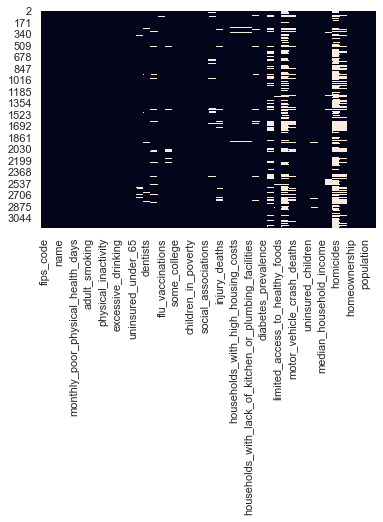

In [117]:
sns.heatmap(df.isna(), cbar=False) #Checking on nan's

In [118]:
df.isnull().sum() #3193 rows 

fips_code                                                    0
state                                                        0
name                                                         0
poor_or_fair_health                                          0
monthly_poor_physical_health_days                            0
monthly_poor_mental_health_days                              0
adult_smoking                                                0
adult_obesity                                                0
physical_inactivity                                          0
access_to_exercise                                           6
excessive_drinking                                           0
alcohol_impaired_driving_deaths                             33
uninsured_under_65                                           1
primary_care_physicians                                    135
dentists                                                    85
mental_health_providers                                

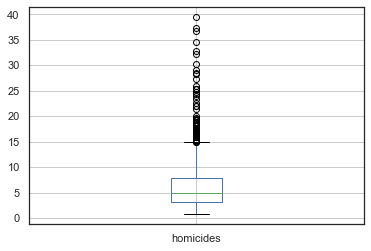

In [119]:
df.boxplot(['homicides'])

In [120]:
df['homicides'].describe()

count    1323.000000
mean        6.290627
std         4.798861
min         0.700000
25%         3.200000
50%         5.000000
75%         7.900000
max        39.500000
Name: homicides, dtype: float64

In [121]:
df['homicides'].fillna(df['homicides'].min(), inplace=True) #1870/3193=58.57%
df['drug_overdose_deaths'].fillna(df['drug_overdose_deaths'].min(), inplace=True) #1422/3193=44.53%
df['firearm_fatalities'].fillna(df['firearm_fatalities'].min(), inplace=True) #933/3193=29.22%
df['hiv_prevalence'].fillna(df['hiv_prevalence'].min(), inplace=True) #718/3193=22.49%
df['motor_vehicle_crash_deaths'].fillna(df['motor_vehicle_crash_deaths'].min(), inplace=True) #442/13.84%
df['violent_crime'].fillna(df['violent_crime'].min(), inplace=True) #191/3193=5.98%
df['injury_deaths'].fillna(df['injury_deaths'].min(), inplace=True) #103/3193=3.23%


df['mental_health_providers'].fillna(df['mental_health_providers'].mean(), inplace=True) #252/3193=7.89%
df['primary_care_physicians'].fillna(df['primary_care_physicians'].mean(), inplace=True) #135/3193=4.23%
df['children_eligible_for_free_or_reduced_price_lunch'].fillna(df['children_eligible_for_free_or_reduced_price_lunch'].mean(), inplace=True) #125/3193=3.91%
df['high_school_grad'].fillna(df['high_school_grad'].mean(), inplace=True) #100/3193=3.13%
df['dentists'].fillna(df['dentists'].mean(), inplace=True) #85/3193=2.66%
df['life_expectancy'].fillna(df['life_expectancy'].mean(), inplace=True) #69/3193=2.16%
df['households_with_high_housing_costs'].fillna(df['households_with_high_housing_costs'].mean(), inplace=True) #50/3193=1.57%
df['households_with_overcrowding'].fillna(df['households_with_overcrowding'].mean(), inplace=True) #50/3193=1.57%
df['households_with_lack_of_kitchen_or_plumbing_facilities'].fillna(df['households_with_lack_of_kitchen_or_plumbing_facilities'].mean(), inplace=True) #50/3193=1.57%


df['alcohol_impaired_driving_deaths'].fillna(df['alcohol_impaired_driving_deaths'].mean(), inplace=True) #33/3193=1.03%
df['other_primary_care_providers'].fillna(df['other_primary_care_providers'].mean(), inplace=True) #26/3193=0.81%
df['limited_access_to_healthy_foods'].fillna(df['limited_access_to_healthy_foods'].mean(), inplace=True) #19/3193=0.60%
df['flu_vaccinations'].fillna(df['flu_vaccinations'].mean(), inplace=True) #16/3193=0.50%
df['access_to_exercise'].fillna(df['access_to_exercise'].mean(), inplace=True) #6/3193=0.19%
df['uninsured_under_65'].fillna(df['uninsured_under_65'].mean(), inplace=True) #1/3193=0.0003%
df['unemployed'].fillna(df['unemployed'].mean(), inplace=True) #1/3193=0.0003%
df['children_in_poverty'].fillna(df['children_in_poverty'].mean(), inplace=True) #1/3193=0.0003%
df['single_parent_households'].fillna(df['single_parent_households'].mean(), inplace=True) #1/3193=0.0003%
df['uninsured_adults'].fillna(df['uninsured_adults'].mean(), inplace=True) #1/3193=0.0003%
df['uninsured_children'].fillna(df['uninsured_children'].mean(), inplace=True) #1/3193=0.0003%
df['median_household_income'].fillna(df['median_household_income'].mean(), inplace=True) #1/3193=0.0003%
df['severe_housing_cost_burden'].fillna(df['severe_housing_cost_burden'].mean(), inplace=True) #1/3193=0.0003%

In [122]:
df.isnull().sum()

fips_code                                                 0
state                                                     0
name                                                      0
poor_or_fair_health                                       0
monthly_poor_physical_health_days                         0
monthly_poor_mental_health_days                           0
adult_smoking                                             0
adult_obesity                                             0
physical_inactivity                                       0
access_to_exercise                                        0
excessive_drinking                                        0
alcohol_impaired_driving_deaths                           0
uninsured_under_65                                        0
primary_care_physicians                                   0
dentists                                                  0
mental_health_providers                                   0
flu_vaccinations                        

# Hypothesis Testing

## Test 1

Null Hypothesis: There is no statistical difference between a life expectancy and the median household income.

Alternate Hypothesis: There is a statistical difference between a life expectancy and the median household income.

In [315]:
df[['life_expectancy', 'median_household_income']].corr()['life_expectancy']

life_expectancy            1.000000
median_household_income    0.623265
Name: life_expectancy, dtype: float64

Text(0.5, 1.0, 'median_household_income')

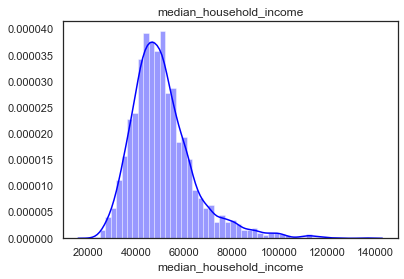

In [316]:
dist1=sns.distplot(df.median_household_income, color='blue', norm_hist=True)
dist1.set_title('median_household_income')

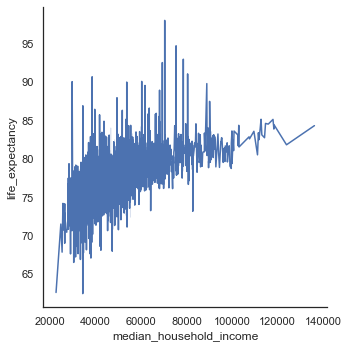

In [123]:
sns.relplot(x='median_household_income', y='life_expectancy', kind='line', data=df)

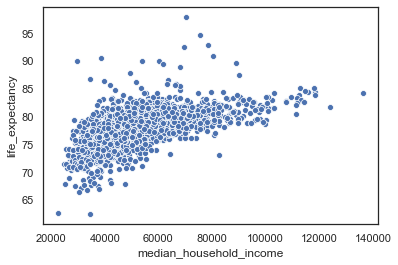

In [251]:
sns.scatterplot(x="median_household_income", y="life_expectancy", data=df)
plt.savefig('median_household_income_vs_life_expectancy.png')

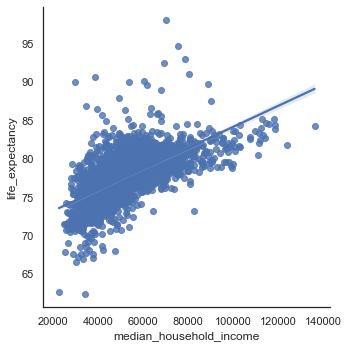

In [214]:
sns.lmplot(x="median_household_income", y="life_expectancy", data=df);

In [208]:
df['median_household_income'].corr(df['life_expectancy'])

0.623264673924721

In [317]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table =  pd.crosstab(df['life_expectancy'],[df['median_household_income']])

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (regject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

dof=9587610
[[0.00031319 0.00031319 0.00031319 ... 0.00031319 0.00031319 0.00031319]
 [0.00031319 0.00031319 0.00031319 ... 0.00031319 0.00031319 0.00031319]
 [0.00031319 0.00031319 0.00031319 ... 0.00031319 0.00031319 0.00031319]
 ...
 [0.00031319 0.00031319 0.00031319 ... 0.00031319 0.00031319 0.00031319]
 [0.00031319 0.00031319 0.00031319 ... 0.00031319 0.00031319 0.00031319]
 [0.00031319 0.00031319 0.00031319 ... 0.00031319 0.00031319 0.00031319]]
probability=0.950, critical=9594813.872, stat=9598019.174)
Dependent (regject H0)
signigicance=0.050, p=0.009,
Dependent (reject H0)


There appears to be a statistically significant relationship between life expectancy and the median household income, thus we can reject the null hypothesis.

## Test 2

Null Hypothesis: There is no statistical difference between a life expectancy and adult obesity.

Alternate Hypothesis: There is a statistical difference between a life expectancy and adult obesity.

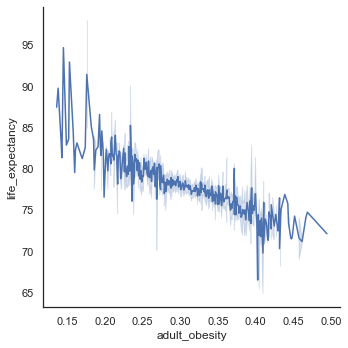

In [124]:
sns.relplot(x='adult_obesity', y='life_expectancy', kind='line', data=df)

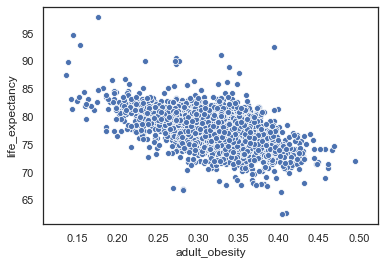

In [215]:
sns.scatterplot(x="adult_obesity", y="life_expectancy", data=df)

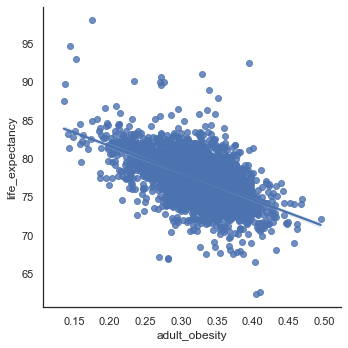

In [216]:
sns.lmplot(x="adult_obesity", y="life_expectancy", data=df);

In [207]:
df['adult_obesity'].corr(df['life_expectancy'])

-0.5406624652863107

In [326]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table =  pd.crosstab(df['life_expectancy'],[df['adult_obesity']])

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (regject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

dof=977499
[[0.00031319 0.00031319 0.00031319 ... 0.00031319 0.00031319 0.00031319]
 [0.00031319 0.00031319 0.00031319 ... 0.00031319 0.00031319 0.00031319]
 [0.00031319 0.00031319 0.00031319 ... 0.00031319 0.00031319 0.00031319]
 ...
 [0.00031319 0.00031319 0.00031319 ... 0.00031319 0.00031319 0.00031319]
 [0.00031319 0.00031319 0.00031319 ... 0.00031319 0.00031319 0.00031319]
 [0.00031319 0.00031319 0.00031319 ... 0.00031319 0.00031319 0.00031319]]
probability=0.950, critical=979799.991, stat=976773.474)
Independent (fail to reject H0)
signigicance=0.050, p=0.698,
Independent (fail to reject)


There appears to be no statistically significant relationship between life expectancy and the adult obesity, thus we can't reject the null hypothesis.

## Test 3

Null Hypothesis: There is no statistical difference between a life expectancy and diabetes prevalence.

Alternate Hypothesis: There is a statistical difference between a life expectancy and diabetes prevalence.

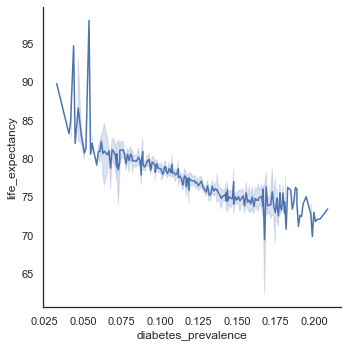

In [125]:
sns.relplot(x='diabetes_prevalence', y='life_expectancy', kind='line', data=df)

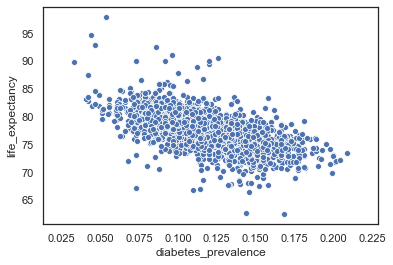

In [253]:
sns.scatterplot(x="diabetes_prevalence", y="life_expectancy", data=df)
plt.savefig('diabetes_prevalence_vs_life_expectancy.png')

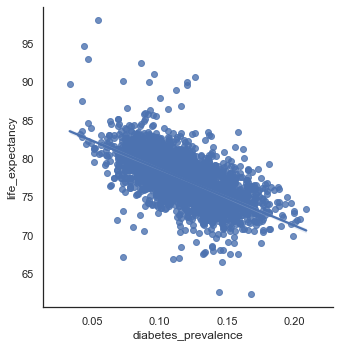

In [219]:
sns.lmplot(x="diabetes_prevalence", y="life_expectancy", data=df);

In [209]:
df['diabetes_prevalence'].corr(df['life_expectancy'])

-0.6435375562312816

In [327]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table =  pd.crosstab(df['life_expectancy'],[df['diabetes_prevalence']])

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (regject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

dof=562140
[[0.00031319 0.00031319 0.00093956 ... 0.00031319 0.00031319 0.00031319]
 [0.00031319 0.00031319 0.00093956 ... 0.00031319 0.00031319 0.00031319]
 [0.00031319 0.00031319 0.00093956 ... 0.00031319 0.00031319 0.00031319]
 ...
 [0.00031319 0.00031319 0.00093956 ... 0.00031319 0.00031319 0.00031319]
 [0.00031319 0.00031319 0.00093956 ... 0.00031319 0.00031319 0.00031319]
 [0.00031319 0.00031319 0.00093956 ... 0.00031319 0.00031319 0.00031319]]
probability=0.950, critical=563885.209, stat=565667.590)
Dependent (regject H0)
signigicance=0.050, p=0.000,
Dependent (reject H0)


There appears to be a statistically significant relationship between life expectancy and diabetes prevalence, thus we can reject the null hypothesis.

## Test 4

Null Hypothesis: There is no statistical difference between a life expectancy and physical inactivity.

Alternate Hypothesis: There is a statistical difference between a life expectancy and physical inactivity.

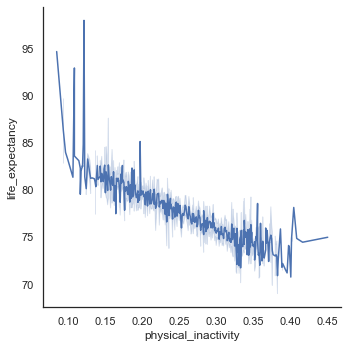

In [126]:
sns.relplot(x='physical_inactivity', y='life_expectancy', kind='line', data=df)

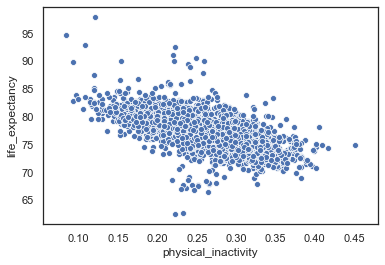

In [220]:
sns.scatterplot(x="physical_inactivity", y="life_expectancy", data=df)

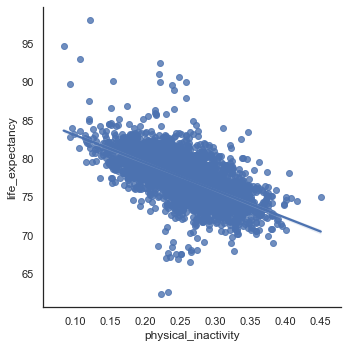

In [221]:
sns.lmplot(x="physical_inactivity", y="life_expectancy", data=df);

In [210]:
df['physical_inactivity'].corr(df['life_expectancy'])

-0.6259073724532481

In [328]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table =  pd.crosstab(df['life_expectancy'],[df['physical_inactivity']])

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (regject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

dof=1030590
[[0.00031319 0.00062637 0.00031319 ... 0.00031319 0.00031319 0.00031319]
 [0.00031319 0.00062637 0.00031319 ... 0.00031319 0.00031319 0.00031319]
 [0.00031319 0.00062637 0.00031319 ... 0.00031319 0.00031319 0.00031319]
 ...
 [0.00031319 0.00062637 0.00031319 ... 0.00031319 0.00031319 0.00031319]
 [0.00031319 0.00062637 0.00031319 ... 0.00031319 0.00031319 0.00031319]
 [0.00031319 0.00062637 0.00031319 ... 0.00031319 0.00031319 0.00031319]]
probability=0.950, critical=1032952.622, stat=1033863.535)
Dependent (regject H0)
signigicance=0.050, p=0.011,
Dependent (reject H0)


There appears to be a statistically significant relationship between life expectancy and physical inactivity, thus we can reject the null hypothesis.

## Test 5

Null Hypothesis: There is no statistical difference between a life expectancy and adult smoking.

Alternate Hypothesis: There is a statistical difference between a life expectancy and adult smoking.

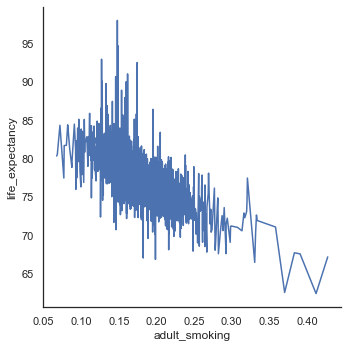

In [127]:
sns.relplot(x='adult_smoking', y='life_expectancy', kind='line', data=df)

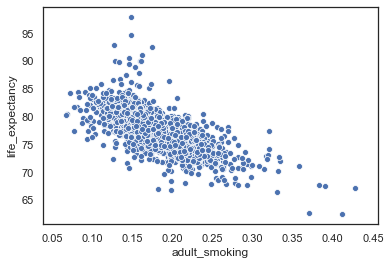

In [252]:
sns.scatterplot(x="adult_smoking", y="life_expectancy", data=df)
plt.savefig('adult_smoking_vs_life_expectancy.png')

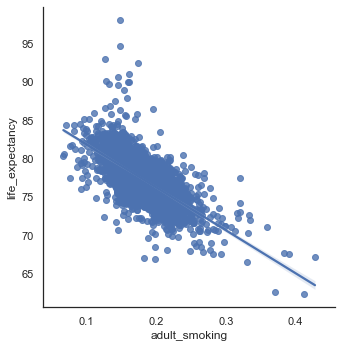

In [250]:
sns.lmplot(x="adult_smoking", y="life_expectancy", data=df);

In [211]:
df['adult_smoking'].corr(df['life_expectancy'])

-0.69250599101686

In [329]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table =  pd.crosstab(df['life_expectancy'],[df['adult_smoking']])

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (regject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

dof=9965493
[[0.00031319 0.00031319 0.00031319 ... 0.00031319 0.00031319 0.00031319]
 [0.00031319 0.00031319 0.00031319 ... 0.00031319 0.00031319 0.00031319]
 [0.00031319 0.00031319 0.00031319 ... 0.00031319 0.00031319 0.00031319]
 ...
 [0.00031319 0.00031319 0.00031319 ... 0.00031319 0.00031319 0.00031319]
 [0.00031319 0.00031319 0.00031319 ... 0.00031319 0.00031319 0.00031319]
 [0.00031319 0.00031319 0.00031319 ... 0.00031319 0.00031319 0.00031319]]
probability=0.950, critical=9972837.443, stat=9971739.000)
Independent (fail to reject H0)
signigicance=0.050, p=0.081,
Independent (fail to reject)


There appears to be no statistically significant relationship between life expectancy and adult smoking, thus we can't reject the null hypothesis.

# Future work/Further Analysis

In [231]:
df.groupby('state')[['life_expectancy']].describe() #Highest: Hawaii, Lowest: Mississippi 

life_expectancy                                                        \
                count       mean       std        min        25%        50%   
state                                                                         
AK               30.0  77.867304  4.865503  67.215888  74.576991  78.527459   
AL               68.0  74.635006  1.694840  70.150316  73.806127  74.351239   
AR               76.0  74.845032  1.668713  70.561614  73.700298  74.753957   
AZ               16.0  78.702755  3.115060  72.360310  77.511675  78.944834   
CA               59.0  80.084261  2.762833  74.542813  78.372009  79.852830   
CO               65.0  80.507185  4.220681  74.547718  77.796382  79.739954   
CT                9.0  80.669541  1.100015  78.821447  79.981856  80.694847   
DC                2.0  78.415456  0.000000  78.415456  78.415456  78.415456   
DE                4.0  78.392043  0.398400  77.805766  78.338063  78.533942   
FL               68.0  78.167359  2.769476  67.958718  76.274404  78.110838   
GA              160.0  76.107697  2.223322  71.324336  74.429565  76.075439   
HI                6.0  81.167160  2.031163  77.464748  80.605244  82.095193   
IA              100.0  79.299693  1.560040  75.964179  78.335624  79.213123   
ID               45.0  79.165283  2.137412  74.195115  77.694469  79.116728   
IL              103.0  77.970831  1.916126  72.331405  76.811179  78.043584   
IN               93.0  76.948619  1.809898  71.432835  75.780957  76.937837   
KS              106.0  77.783208  2.309814  70.750160  76.245824  77.800058   
KY              121.0  74.405357  2.220722  67.836452  73.035519  74.400473   
LA               65.0  75.356207  1.907082  70.717241  74.199568  75.247137   
MA               15.0  80.336000  1.320085  78.673740  79.315857  80.253263   
MD               25.0  78.532941  2.441580  73.001926  76.693970  78.922920   
ME               17.0  78.196205  1.241086  75.951433  77.583294  78.444149   
MI               84.0  78.130788  1.665718  74.802048  77.094452  77.993439   
MN               88.0  80.315343  2.002288  72.664329  79.239536  80.582481   
MO              116.0  76.667623  1.945542  70.746617  75.336147  76.725685   
MS               83.0  74.087409  1.893595  70.155742  72.624202  74.120591   
MT               57.0  78.297151  3.325545  68.084071  77.464748  78.868082   
NC              101.0  77.099752  1.796958  73.294631  75.825002  76.893914   
ND               54.0  79.347334  3.291890  67.745553  78.076080  79.543124   
NE               94.0  79.137344  2.102555  70.631125  77.955675  78.824931   
NH               11.0  79.197537  1.122469  76.760781  78.743291  79.292765   
NJ               22.0  79.962318  2.155253  75.710420  78.425353  80.019877   
NM               34.0  77.570164  2.901540  72.700812  76.113331  77.407227   
NV               18.0  78.794470  3.869607  74.124636  76.639940  78.050471   
NY               63.0  79.610379  1.625530  77.200769  78.471998  79.296795   
OH               89.0  76.931940  1.888379  72.956033  75.991658  76.948659   
OK               78.0  75.192019  2.134027  71.248859  73.758834  74.938709   
OR               37.0  78.868989  1.613040  76.200530  77.563595  78.743228   
PA               68.0  78.105439  1.573461  75.064089  76.965876  77.970468   
RI                6.0  80.285014  0.966716  79.175319  79.459766  80.323902   
SC               47.0  75.749477  2.234109  71.113806  74.230017  75.819216   
SD               67.0  77.751384  4.773196  62.441612  77.369988  78.890659   
TN               96.0  74.927526  1.848724  70.621476  73.713901  74.698299   
TX              255.0  77.410943  2.423589  72.335108  75.835168  77.304410   
UT               30.0  79.062568  1.953046  74.890440  77.575508  79.076870   
VA              134.0  77.529232  3.646558  66.883914  75.544883  77.603881   
VT               15.0  79.154922  1.604120  75.396890  78.365487  78.968801   
WA               40.0  79.826125  1.936471  76.261805  7

In [129]:
df_ms = df.loc[(df.state == 'MS')]
df_ms

fips_code state              name  poor_or_fair_health  \
1427      28000    MS       Mississippi             0.222107   
1428      28001    MS      Adams County             0.252348   
1429      28003    MS     Alcorn County             0.206829   
1430      28005    MS      Amite County             0.233394   
1431      28007    MS     Attala County             0.223945   
...         ...   ...               ...                  ...   
1505      28155    MS    Webster County             0.203296   
1506      28157    MS  Wilkinson County             0.287746   
1507      28159    MS    Winston County             0.269750   
1508      28161    MS  Yalobusha County             0.237355   
1509      28163    MS      Yazoo County             0.271460   

      monthly_poor_physical_health_days  monthly_poor_mental_health_days  \
1427                           4.374736                         4.420219   
1428                           4.294514                         4.335378   
1429                           4.240856                         4.409242   
1430                           4.445175                         4.371345   
1431                           4.211989                         4.115317   
...                                 ...                              ...   
1505                           4.119132                         4.098474   
1506                           4.737805                         4.354119   
1507                           4.733958                         4.528840   
1508                           4.588129                         4.361506   
1509                           4.666246                         4.405847   

      adult_smoking  adult_obesity  physical_inactivity  access_to_exercise  \
1427       0.227407          0.365                0.313            0.554734   
1428       0.228640          0.378                0.309            0.690776   
1429       0.191566          0.360                0.348            0.278760   
1430       0.206888          0.413                0.341            0.407814   
1431       0.187388          0.395                0.336            0.339297   
...             ...            ...                  ...                 ...   
1505       0.189390          0.336                0.316            0.000000   
1506       0.232516          0.383                0.347            0.109739   
1507       0.214308          0.373                0.343            0.269403   
1508       0.208852          0.362                0.356            0.345165   
1509       0.250480          0.406                0.338            0.430928   

      excessive_drinking  alcohol_impaired_driving_deaths  uninsured_under_65  \
1427            0.136770                         0.212279            0.139798   
1428            0.125201                         0.307692            0.140841   
1429            0.135918                         0.153846            0.141820   
1430            0.113224                         0.307692            0.172025   
1431            0.121838                         0.083333            0.138016   
...                  ...                              ...                 ...   
1505            0.132172                         0.083333            0.139073   
1506            0.109543                         0.416667            0.152466   
1507            0.117245                         0.133333            0.164606   
1508            0.117362                         0.157895            0.138429   
1509            0.122936                         0.258065            0.150690   

      primary_care_physicians  dentists  mental_health_providers  \
1427                 0.000528  0.000467                 0.001425   
1428                 0.000832  0.000452                 0.000710   
1429                 0.000295  0.000484                 0.002741   
1430                 0.000161  0.000241                 0.000080   
1431                 0.000475  0.000325                 0.0002

In [130]:
df_ms.to_csv('df_ms.csv')
#Will convert to csv to have a completed clean df ready to be further analyzed and converted to visuals

In [131]:
df.groupby('fips_code')[['life_expectancy']].describe()

life_expectancy                                                  \
                    count       mean std        min        25%        50%   
fips_code                                                                   
1000                  1.0  75.413035 NaN  75.413035  75.413035  75.413035   
1001                  1.0  76.330589 NaN  76.330589  76.330589  76.330589   
1003                  1.0  78.599498 NaN  78.599498  78.599498  78.599498   
1005                  1.0  75.779457 NaN  75.779457  75.779457  75.779457   
1007                  1.0  73.928271 NaN  73.928271  73.928271  73.928271   
...                   ...        ...  ..        ...        ...        ...   
56037                 1.0  77.840131 NaN  77.840131  77.840131  77.840131   
56039                 1.0  87.438200 NaN  87.438200  87.438200  87.438200   
56041                 1.0  78.397790 NaN  78.397790  78.397790  78.397790   
56043                 1.0  80.465989 NaN  80.465989  80.465989  80.465989   
56045                 1.0  81.596294 NaN  81.596294  81.596294  81.596294   

                                 
                 75%        max  
fips_code                        
1000       75.413035  75.413035  
1001       76.330589  76.330589  
1003       78.599498  78.599498  
1005       75.779457  75.779457  
1007       73.928271  73.928271  
...              ...        ...  
56037      77.840131  77.840131  
56039      87.438200  87.438200  
56041      78.397790  78.397790  
56043      80.465989  80.465989  
56045      81.596294  81.596294  

[3193 rows x 8 columns]

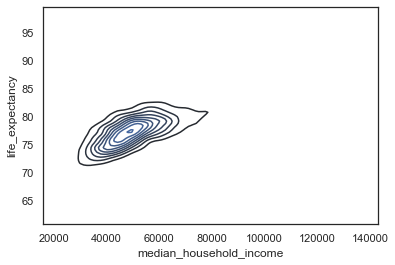

In [132]:
sns.kdeplot(df.median_household_income, df.life_expectancy)

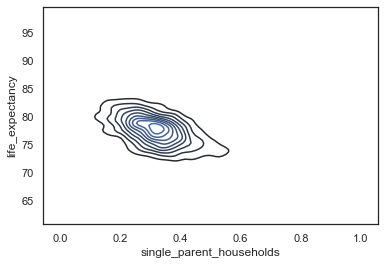

In [133]:
sns.kdeplot(df.single_parent_households, df.life_expectancy)

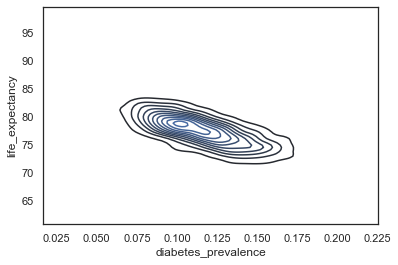

In [134]:
sns.kdeplot(df.diabetes_prevalence, df.life_expectancy)

# Feature Selection

In [135]:
features = ['poor_or_fair_health', 
            'monthly_poor_physical_health_days', 'monthly_poor_mental_health_days', 
            'adult_smoking', 'adult_obesity', 'physical_inactivity', 'access_to_exercise',
            'excessive_drinking', 'alcohol_impaired_driving_deaths', 'uninsured_under_65',
            'primary_care_physicians', 'dentists', 'mental_health_providers', 'flu_vaccinations', 
            'high_school_grad', 'some_college', 'unemployed', 'children_in_poverty', 
            'single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 
            'severe_housing_problems', 'households_with_high_housing_costs', 
            'households_with_overcrowding', 'households_with_lack_of_kitchen_or_plumbing_facilities',
            'diabetes_prevalence', 'hiv_prevalence', 
            'limited_access_to_healthy_foods', 'drug_overdose_deaths', 'motor_vehicle_crash_deaths', 
            'uninsured_adults', 'uninsured_children', 'other_primary_care_providers',
            'median_household_income', 'children_eligible_for_free_or_reduced_price_lunch',
            'homicides', 'firearm_fatalities', 'homeownership', 'severe_housing_cost_burden', 
            'population', 'proficient_in_English']

In [136]:
#Distribute columns into groups of 4 per row
n = 4
row_groups = [features[i:i+n] for i in range(0, len(features), n)]

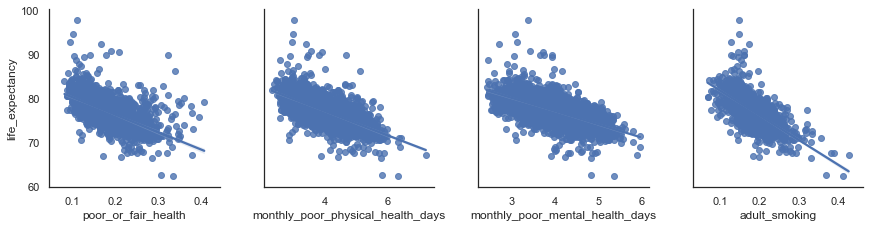

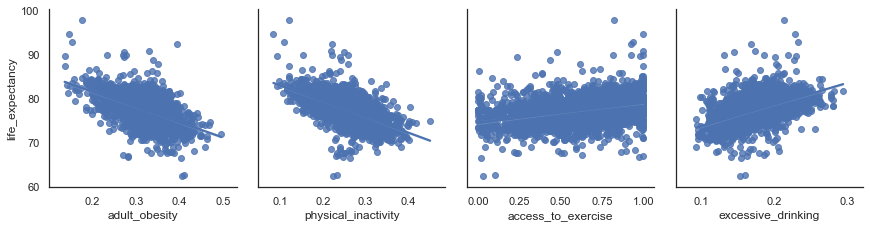

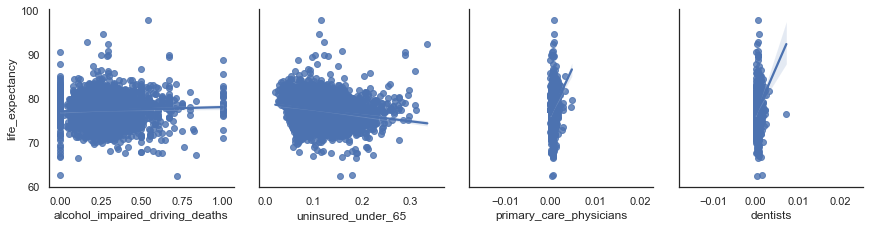

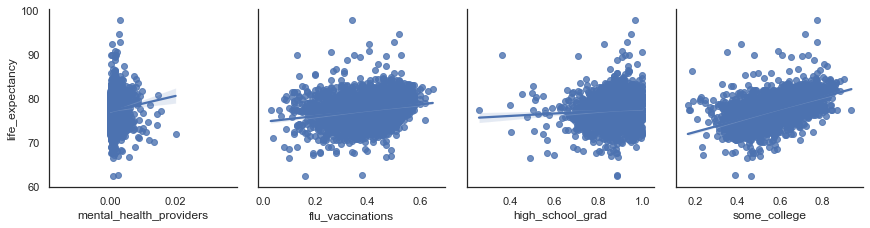

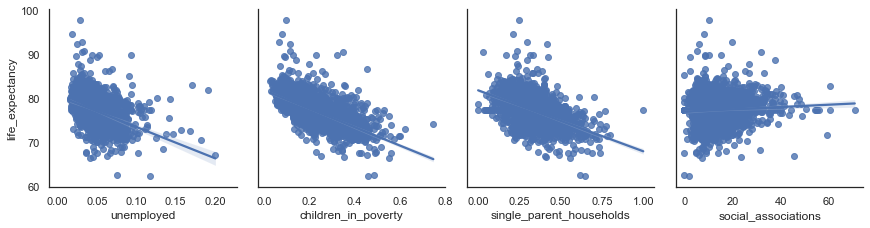

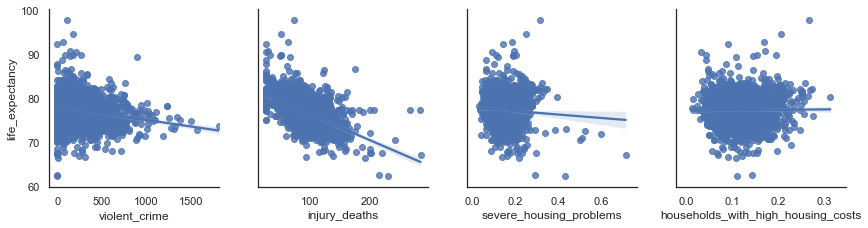

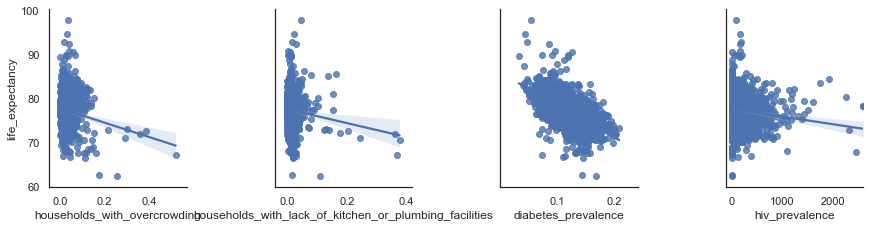

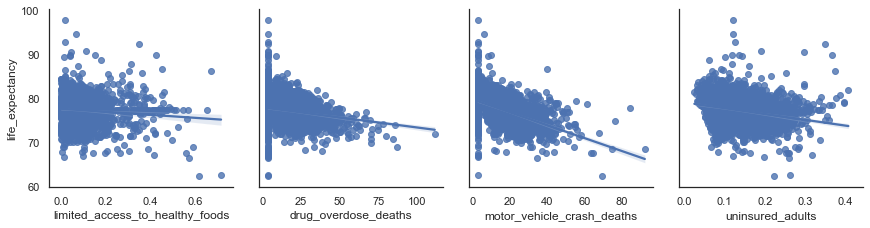

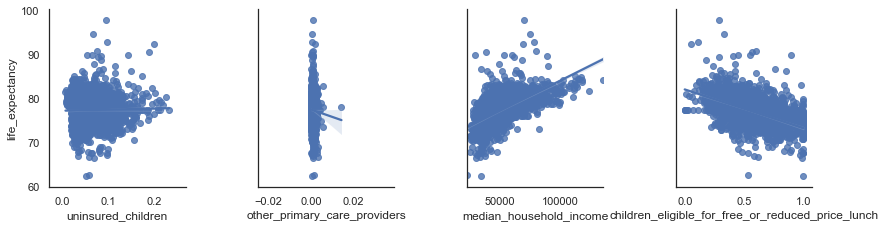

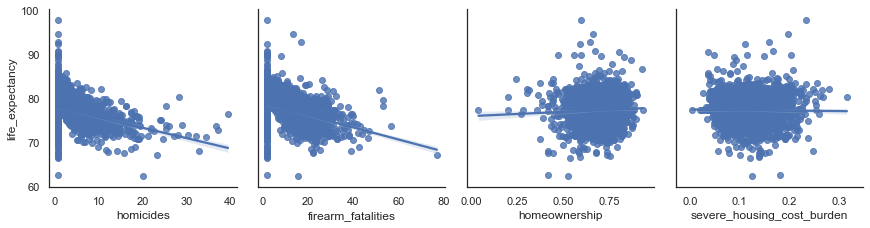

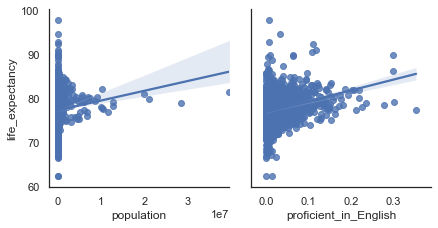

In [137]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['life_expectancy'],x_vars=i, kind="reg", height=3)

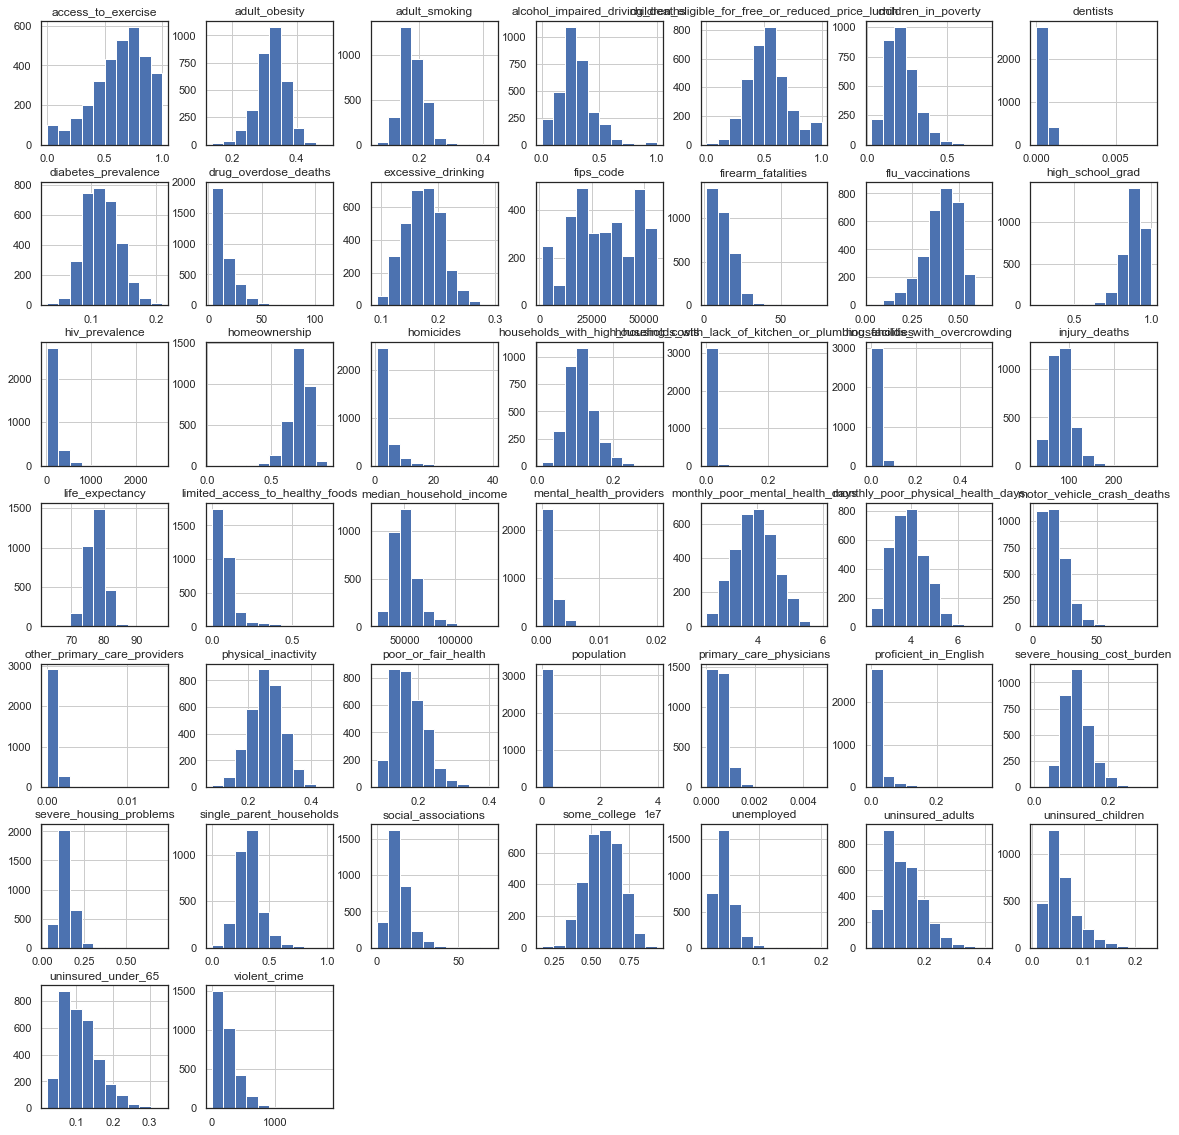

In [138]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax);

In [139]:
df.describe()

fips_code  poor_or_fair_health  monthly_poor_physical_health_days  \
count   3193.000000          3193.000000                        3193.000000   
mean   30360.922643             0.174683                           3.919659   
std    15171.912105             0.046796                           0.711930   
min     1000.000000             0.082892                           2.323511   
25%    18173.000000             0.139482                           3.393484   
50%    29175.000000             0.166871                           3.868616   
75%    45075.000000             0.204319                           4.408862   
max    56045.000000             0.407324                           7.230990   

       monthly_poor_mental_health_days  adult_smoking  adult_obesity  \
count                      3193.000000    3193.000000    3193.000000   
mean                          3.931839       0.178669       0.320284   
std                           0.612364       0.036573       0.045884   
min                           2.439654       0.067354       0.136000   
25%                           3.492944       0.152342       0.293000   
50%                           3.932477       0.173155       0.323000   
75%                           4.348086       0.202752       0.350000   
max                           5.964156       0.427541       0.495000   

       physical_inactivity  access_to_exercise  excessive_drinking  \
count          3193.000000         3193.000000         3193.000000   
mean              0.256439            0.631944            0.174308   
std               0.051743            0.230313            0.032448   
min               0.084000            0.000000            0.092652   
25%               0.222000            0.492828            0.151017   
50%               0.256000            0.667083            0.174027   
75%               0.291000            0.802785            0.196776   
max               0.451000            1.000000            0.294401   

       alcohol_impaired_driving_deaths  uninsured_under_65  \
count                      3193.000000         3193.000000   
mean                          0.292651            0.111082   
std                           0.150330            0.049250   
min                           0.000000            0.020682   
25%                           0.203262            0.071562   
50%                           0.285714            0.103638   
75%                           0.360000            0.139869   
max                           1.000000            0.334537   

       primary_care_physicians     dentists  mental_health_providers  \
count              3193.000000  3193.000000              3193.000000   
mean                  0.000549     0.000457                 0.001517   
std                   0.000344     0.000309                 0.001543   
min                   0.000000     0.000000                 0.000000   
25%                   0.000331     0.000266                 0.000495   
50%                   0.000510     0.000421                 0.001186   
75%                   0.000707     0.000604                 0.001929   
max                   0.004772     0.007251                 0.020027   

       flu_vaccinations  high_school_grad  some_college   unemployed  \
count       3193.000000       3193.000000   3193.000000  3193.000000   
mean           0.405458          0.882537      0.577437     0.046119   
std            0.096690          0.073250      0.116726     0.016674   
min            0.030000          0.256400      0.167562     0.016242   
25%            0.350000          0.847061      0.495270     0.035223   
50%            0.420000          0.891832      0.579145     0.043620   
75%            0.480000          0.933300      0.662186     0.053390   
max            0.650000          1.000000      0.936709     0.200713   

       children_in_poverty  single_parent_households  social_associations  \
count          3193.000000               3193.000000          3193.000000   
mean   

# First OLS Model (All Features)

In [140]:
mlr_model = ols(formula='life_expectancy~poor_or_fair_health+monthly_poor_physical_health_days+monthly_poor_mental_health_days+adult_smoking+adult_obesity+physical_inactivity+access_to_exercise+excessive_drinking+alcohol_impaired_driving_deaths+uninsured_under_65+primary_care_physicians+dentists+mental_health_providers+flu_vaccinations+high_school_grad+some_college+unemployed+children_in_poverty+single_parent_households+social_associations+violent_crime+injury_deaths+severe_housing_problems+households_with_high_housing_costs+households_with_overcrowding+households_with_lack_of_kitchen_or_plumbing_facilities+diabetes_prevalence+hiv_prevalence+limited_access_to_healthy_foods+drug_overdose_deaths+motor_vehicle_crash_deaths+uninsured_adults+uninsured_children+other_primary_care_providers+median_household_income+children_eligible_for_free_or_reduced_price_lunch+homicides+firearm_fatalities+homeownership+severe_housing_cost_burden+population+proficient_in_English', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     200.8
Date:                Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:56:41   Log-Likelihood:                -5912.4
No. Observations:                3193   AIC:                         1.191e+04
Df Residuals:                    3150   BIC:                         1.217e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 83.6323      1.042     80.274      0.000      81.589      85.675
poor_or_fair_health                                       -1.1819      2.143     -0.552      0.581      -5.383       3.019
monthly_poor_physical_health_days                          0.1405      0.171      0.820      0.412      -0.195       0.476
monthly_poor_mental_health_days                           -0.1605      0.144     -1.115      0.265      -0.443       0.122
adult_smoking                                            -11.2180      1.731     -6.482      0.000     -14.611      -7.825
adult_obesity                                             -1.5193      1.018     -1.493      0.136      -3.515       0.477
physical_inactivity                                       -6.6098      1.011     -6.536      0.000      -8.593      -4.627
access_to_exercise                                         0.2554      0.165      1.551      0.121      -0.067       0.578
excessive_drinking                                         2.9190      1.460      1.999      0.046       0.056       5.782
alcohol_impaired_driving_deaths                            0.4971      0.191      2.609      0.009       0.123       0.871
uninsured_under_65                                       152.1867     12.416     12.257      0.000     127.842     176.531
primary_care_physicians                                  404.2719    109.471      3.693      0.000     189.630     618.914
dentists                                                 104.8431    118.342      0.886      0.376    -127.191     336.877
mental_health_providers                                  -51.2097     22.576     -2.268      0.023     -95.475      -6.944
flu_vaccinations                                          -0.3961      0.362     -1.094      0.274      -1.106       0.314
high_school_grad                                          -1.9075      0.450     -4.235      0.000      -2.791      -1.024
some_college                                               1.1436      0.413      2.770      0.006       0.334       1.953
unemployed                                                -4.7889      2.393     -2.001      0.045      -9.480      -0.098
children_in_poverty                                       -2.8385      0.835     -3.399      0.001      -4.476      -1.201
single_parent_households                                  -0.5324      0.451     -1.180      0.238      -1.417       0.352
social_associations                                       -0.0142      0.005     -2.755      0.006      -0.024      -0.004
violent_crime                                             -0.0009      0.000     -4.743      0.000      -0.001      -0.001
injury_d

In [141]:
features= ['poor_or_fair_health', 
            'monthly_poor_physical_health_days', 'monthly_poor_mental_health_days', 
            'adult_smoking', 'adult_obesity', 'physical_inactivity', 'access_to_exercise',
            'excessive_drinking', 'alcohol_impaired_driving_deaths',
            'flu_vaccinations', 
            'high_school_grad', 'some_college', 'unemployed', 'children_in_poverty', 
            'single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 
            'severe_housing_problems', 'households_with_high_housing_costs', 
            'households_with_overcrowding', 'households_with_lack_of_kitchen_or_plumbing_facilities',
            'diabetes_prevalence', 'hiv_prevalence', 
            'limited_access_to_healthy_foods', 'drug_overdose_deaths', 'motor_vehicle_crash_deaths', 
            'uninsured_adults', 'uninsured_children', 'other_primary_care_providers',
            'median_household_income', 'children_eligible_for_free_or_reduced_price_lunch',
            'homicides', 'firearm_fatalities', 'homeownership', 'severe_housing_cost_burden', 
            'proficient_in_English']

df_features = df[features]

target = df['life_expectancy']

In [142]:
corr = df_features.corr()
corr.style.background_gradient(cmap="coolwarm").set_precision(2)

# Second OLS Model (Select Features)

In [143]:
mlr_model_2 = ols(formula='life_expectancy~poor_or_fair_health+monthly_poor_physical_health_days+monthly_poor_mental_health_days+adult_smoking+adult_obesity+physical_inactivity+access_to_exercise+excessive_drinking+alcohol_impaired_driving_deaths+primary_care_physicians+dentists+mental_health_providers+flu_vaccinations+high_school_grad+some_college+unemployed+children_in_poverty+single_parent_households+social_associations+violent_crime+injury_deaths+severe_housing_problems+households_with_high_housing_costs+households_with_overcrowding+households_with_lack_of_kitchen_or_plumbing_facilities+diabetes_prevalence+hiv_prevalence+limited_access_to_healthy_foods+drug_overdose_deaths+motor_vehicle_crash_deaths+uninsured_adults+uninsured_children+other_primary_care_providers+median_household_income+children_eligible_for_free_or_reduced_price_lunch+homicides+firearm_fatalities+homeownership+severe_housing_cost_burden+proficient_in_English', data=df).fit()
mlr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     197.8
Date:                Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:56:41   Log-Likelihood:                -5986.8
No. Observations:                3193   AIC:                         1.206e+04
Df Residuals:                    3152   BIC:                         1.230e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 84.2220      1.065     79.103      0.000      82.134      86.310
poor_or_fair_health                                       -4.3374      2.177     -1.993      0.046      -8.605      -0.070
monthly_poor_physical_health_days                          0.1489      0.175      0.849      0.396      -0.195       0.493
monthly_poor_mental_health_days                           -0.0325      0.147     -0.221      0.825      -0.321       0.256
adult_smoking                                            -11.5742      1.770     -6.539      0.000     -15.045      -8.104
adult_obesity                                             -3.3758      1.029     -3.281      0.001      -5.393      -1.358
physical_inactivity                                       -6.1586      1.034     -5.957      0.000      -8.186      -4.131
access_to_exercise                                         0.2448      0.168      1.453      0.146      -0.086       0.575
excessive_drinking                                         2.5717      1.494      1.722      0.085      -0.357       5.500
alcohol_impaired_driving_deaths                            0.5979      0.195      3.070      0.002       0.216       0.980
primary_care_physicians                                  432.7810    111.990      3.864      0.000     213.200     652.362
dentists                                                  55.5117    121.021      0.459      0.646    -181.777     292.800
mental_health_providers                                  -53.0653     23.100     -2.297      0.022     -98.358      -7.773
flu_vaccinations                                          -0.1257      0.370     -0.340      0.734      -0.851       0.599
high_school_grad                                          -2.0890      0.461     -4.535      0.000      -2.992      -1.186
some_college                                               0.7879      0.420      1.875      0.061      -0.036       1.612
unemployed                                                -4.2133      2.447     -1.722      0.085      -9.012       0.585
children_in_poverty                                       -2.8665      0.855     -3.355      0.001      -4.542      -1.191
single_parent_households                                  -0.4493      0.462     -0.973      0.331      -1.355       0.456
social_associations                                       -0.0123      0.005     -2.333      0.020      -0.023      -0.002
violent_crime                                             -0.0009      0.000     -4.590      0.000      -0.001      -0.000
injury_deaths                                             -0.0181      0.002    -12.021      0.000      -0.021      -0.015
severe_h

In [144]:
df_features

poor_or_fair_health  monthly_poor_physical_health_days  \
2                0.214024                           4.400458   
3                0.184111                           4.200578   
4                0.180605                           4.098748   
5                0.257734                           5.067438   
6                0.199969                           4.363377   
...                   ...                                ...   
3190             0.153772                           3.536556   
3191             0.121817                           3.166316   
3192             0.158858                           3.677538   
3193             0.161261                           3.601687   
3194             0.132375                           3.448064   

      monthly_poor_mental_health_days  adult_smoking  adult_obesity  \
2                            4.577367       0.215382          0.351   
3                            4.306739       0.191247          0.375   
4                            4.249649       0.167955          0.310   
5                            4.634994       0.215409          0.443   
6                            4.315710       0.199164          0.378   
...                               ...            ...            ...   
3190                         3.543546       0.175669          0.302   
3191                         3.072253       0.141373          0.136   
3192                         3.699922       0.181806          0.318   
3193                         3.479694       0.156076          0.297   
3194                         3.418715       0.171381          0.309   

      physical_inactivity  access_to_exercise  excessive_drinking  \
2                   0.282            0.616496            0.141781   
3                   0.311            0.686775            0.168780   
4                   0.238            0.719710            0.167150   
5                   0.282            0.536257            0.126987   
6                   0.349            0.162514            0.159252   
...                   ...                 ...                 ...   
3190                0.256            0.901452            0.203251   
3191                0.120            0.997182            0.204511   
3192                0.235            0.813003            0.160586   
3193                0.260            0.818352            0.163430   
3194                0.225            0.271504            0.178570   

      alcohol_impaired_driving_deaths  flu_vaccinations  high_school_grad  \
2                            0.285903              0.42          0.893000   
3                            0.288136              0.41          0.900000   
4                            0.318750              0.45          0.863616   
5                            0.296296              0.37          0.814103   
6                            0.272727              0.39          0.837638   
...                               ...               ...               ...   
3190                         0.333333              0.37          0.800676   
3191                         0.200000              0.47          0.934641   
3192                         0.200000              0.33          0.846875   
3193                         0.200000              0.43          0.862903   
3194                         0.300000              0.17          0.901235   

      some_college  unemployed  children_in_poverty  single_parent_households  \
2         0.598647    0.043968                0.244                  0.381046   
3         0.608547    0.038635                0.193                  0.247001   
4         0.661339    0.039883                0.147                  0.251841   
5         0.367740    0.059009                0.503                  0.572157   
6         0.484063    0.043851                0.273                  0.295654   
...            ...         ...                  ...                       ...   
3190      0.592955    0.045503                0.134            

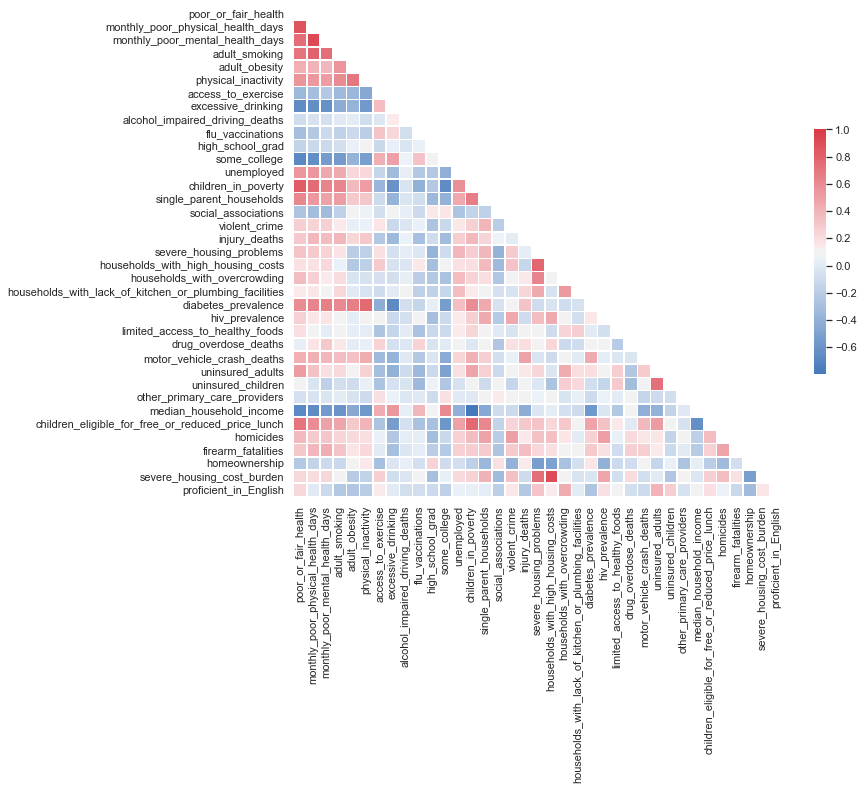

In [314]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corr, dropDuplicates = True)
plt.savefig('df_heatmap.png')

In [313]:
from scipy.stats import sem, t
from scipy import mean
confidence = 0.95

data = df['life_expectancy']

n = len(data)
m = mean(data)
# find Standard error of the mean
std_err_p = sem(data)

h = std_err_p * t.ppf((1 + confidence) / 2, n - 1)

start = m - h
print(start)


end = m + h
print(end)

77.36216841256162
77.56732834773983


Confidence interval for life expectancy is between 77.36 and 77.57 years old. Thus, we can say with 95% certainty that the true mean of life expectancy is between 77.36 and 77.57 years old.

# Train Test Split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=25,test_size=0.2)

In [147]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [148]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 1.5743842735288447


In [149]:
#use fitted model to predict on the test examples
y_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 1.6391347193553294
Training:  1 vs. Testing:  1


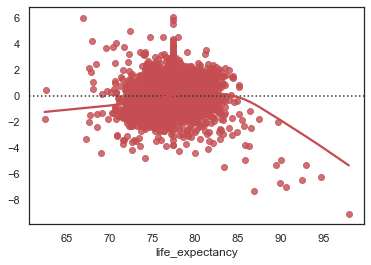

In [150]:
sns.residplot( y_train, y_train_pred,lowess=True, color="r")

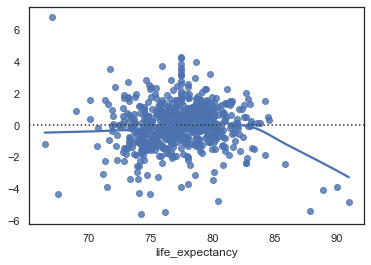

In [151]:
sns.residplot( y_test, y_pred, lowess=True, color="b")

In [152]:
y_log = np.sqrt(y_train)

In [153]:
#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log = lm_log.fit(X_train, y_log)

y_train_pred = lm_log.predict(X_train)

#exponentiate the predictions to get them on the same original scale 
y_train_pred = np.square(y_train_pred)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 1.5740083080327474


In [154]:
y_test_pred = lm_log.predict(X_test)


#our model predcicte the log of gross, so now we must exponentiate to get the value in $
y_test_pred = np.square(y_test_pred)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 1.636546615939479
Training:  1 vs. Testing:  1


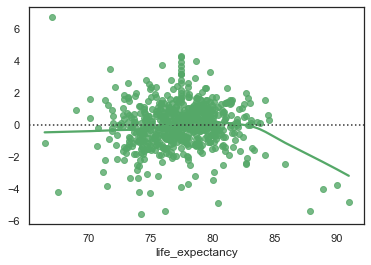

In [155]:
sns.residplot( y_test, y_test_pred, lowess=True, color="g")

# Polynomial

In [156]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

poor_or_fair_health  monthly_poor_physical_health_days  \
0             0.214024                           4.400458   
1             0.184111                           4.200578   
2             0.180605                           4.098748   
3             0.257734                           5.067438   
4             0.199969                           4.363377   

   monthly_poor_mental_health_days  adult_smoking  adult_obesity  \
0                         4.577367       0.215382          0.351   
1                         4.306739       0.191247          0.375   
2                         4.249649       0.167955          0.310   
3                         4.634994       0.215409          0.443   
4                         4.315710       0.199164          0.378   

   physical_inactivity  access_to_exercise  excessive_drinking  \
0                0.282            0.616496            0.141781   
1                0.311            0.686775            0.168780   
2                0.238            0.719710            0.167150   
3                0.282            0.536257            0.126987   
4                0.349            0.162514            0.159252   

   alcohol_impaired_driving_deaths  flu_vaccinations  high_school_grad  \
0                         0.285903              0.42          0.893000   
1                         0.288136              0.41          0.900000   
2                         0.318750              0.45          0.863616   
3                         0.296296              0.37          0.814103   
4                         0.272727              0.39          0.837638   

   some_college  unemployed  children_in_poverty  single_parent_households  \
0      0.598647    0.043968                0.244                  0.381046   
1      0.608547    0.038635                0.193                  0.247001   
2      0.661339    0.039883                0.147                  0.251841   
3      0.367740    0.059009                0.503                  0.572157   
4      0.484063    0.043851                0.273                  0.295654   

   social_associations  violent_crime  injury_deaths  severe_housing_problems  \
0            12.242716     479.919182      79.908979                 0.149122   
1            12.631731     272.282220      74.031808                 0.149546   
2            10.692213     203.660396      69.374289                 0.138317   
3             8.472944     414.277861      72.900134                 0.154555   
4            10.157665      89.349126     100.077937                 0.109609   

   households_with_high_housing_costs  households_with_overcrowding  \
0                            0.114276                      0.024134   
1                            0.132052                      0.024516   
2                            0.125693                      0.010728   
3                            0.136743                      0.020065   
4                            0.108081                      0.001993   

   households_with_lack_of_kitchen_or_plumbing_facilities  \
0                                           0.012604        
1                                           0.006374        
2                                           0.006072        
3                                           0.008134        
4                                           0.002847        

   diabetes_prevalence  hiv_prevalence  limited_access_to_healthy_foods  \
0                0.139           302.4                         0.079214   
1                0.142           225.5                         0.119911   
2                0.113           163.9                         0.054244   
3                0.180           436.0                         0.107397   
4                0.149           191.9                         0.026016   

   drug_overdose_deaths  motor_vehicle_crash_deaths  uninsured_adults  \
0             15.941603                   19.404282          0.138500   
1              9.623076               

In [157]:
df_poly2.shape

(3193, 740)

In [158]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_poly2, target, random_state=25,test_size=0.2)

In [159]:
scaler2 = StandardScaler()
scaled = scaler2.fit(X_train2)

X_train2 = pd.DataFrame(data=scaler2.transform(X_train2), columns=df_poly2.columns)

X_test2 = pd.DataFrame(data=scaler2.transform(X_test2), columns=df_poly2.columns)

In [160]:
X_test2.head()

poor_or_fair_health  monthly_poor_physical_health_days  \
0             2.481885                           1.291657   
1            -0.575477                          -0.070724   
2            -1.085898                          -1.362340   
3            -0.682865                          -0.572563   
4            -1.346057                          -2.014137   

   monthly_poor_mental_health_days  adult_smoking  adult_obesity  \
0                         1.059831       1.498848       2.109552   
1                         0.161169      -0.979527      -0.698610   
2                        -1.141742      -0.943291      -0.023780   
3                        -0.664121      -0.617344       0.977580   
4                        -2.385732       0.128104       0.150369   

   physical_inactivity  access_to_exercise  excessive_drinking  \
0             1.255570            0.407362           -2.247876   
1            -0.800369            0.994586            1.381445   
2             0.852068           -2.611250           -0.558164   
3            -0.627439           -0.953935            1.402618   
4            -1.050155            0.568632            2.695487   

   alcohol_impaired_driving_deaths  flu_vaccinations  high_school_grad  \
0                        -1.216632         -0.562466         -2.013717   
1                         0.173272         -0.153085          0.240795   
2                        -1.962435         -0.562466          1.623488   
3                        -0.196060          0.870369         -0.525913   
4                         0.674510          0.563333         -0.203329   

   some_college  unemployed  children_in_poverty  single_parent_households  \
0     -0.033238    1.605949             3.222498                  3.704463   
1      1.799755   -0.448239            -0.383179                  0.674807   
2      0.931917   -0.730001            -0.717038                 -1.679031   
3     -0.369064   -0.466063            -0.271893                 -0.156326   
4      0.602144   -1.152599            -1.451528                 -1.413054   

   social_associations  violent_crime  injury_deaths  severe_housing_problems  \
0            -0.578509      -1.219660       1.537076                 0.600246   
1            -0.005582       2.542317      -1.226744                 1.779957   
2             5.984088      -0.160747       3.588057                -0.796216   
3            -0.535775      -1.050630       1.748056                -0.115600   
4            -0.167524      -0.449500      -0.383646                -0.742915   

   households_with_high_housing_costs  households_with_overcrowding  \
0                            0.934165                     -0.009607   
1                            2.554191                     -0.037369   
2                           -0.704482                     -1.005089   
3                           -0.050728                     -0.161146   
4                           -1.032280                      0.304959   

   households_with_lack_of_kitchen_or_plumbing_facilities  \
0                                           0.324347        
1                                          -0.274580        
2                                           1.468912        
3                                          -0.101251        
4                                          -0.368926        

   diabetes_prevalence  hiv_prevalence  limited_access_to_healthy_foods  \
0             2.159342        3.292918                         0.925814   
1            -0.994107        1.641432                        -0.034140   
2             0.274964       -0.696688                        -0.508896   
3             0.390334       -0.214015                        -0.989830   
4            -1.609414       -0.557084                        -0.612951   

   drug_overdose_deaths  motor_vehicle_crash_deaths  uninsured_adults  \
0              0.394376                    1.051832          0.693498   
1             -0.435849               

In [161]:
lm_2 = LinearRegression()

lm_2 = lm_2.fit(X_train2, y_train2)

y_train_pred2 = lm_2.predict(X_train2)

train2_rmse = np.sqrt(metrics.mean_squared_error(y_train2, y_train_pred2))

print('Training Root Mean Squared Error:' , train2_rmse)

Training Root Mean Squared Error: 1.0298128498262626


In [162]:
y_pred2 = lm_2.predict(X_test2)

test2_rmse = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))

print('Testing Root Mean Squared Error:' , test2_rmse)

Testing Root Mean Squared Error: 2.0133305119976903


In [163]:
print('Training: ', int(train2_rmse), "vs. Testing: ", int(test2_rmse))

Training:  1 vs. Testing:  2


In [164]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

poor_or_fair_health  \
poor_or_fair_health                                                 NaN   
monthly_poor_physical_health_days                                   NaN   
monthly_poor_mental_health_days                                     NaN   
adult_smoking                                                       NaN   
adult_obesity                                                       NaN   
physical_inactivity                                                 NaN   
access_to_exercise                                                  NaN   
excessive_drinking                                                  NaN   
alcohol_impaired_driving_deaths                                     NaN   
flu_vaccinations                                                    NaN   
high_school_grad                                                    NaN   
some_college                                                        NaN   
unemployed                                                          NaN   
children_in_poverty                                                 NaN   
single_parent_households                                            NaN   
social_associations                                                 NaN   
violent_crime                                                       NaN   
injury_deaths                                                       NaN   
severe_housing_problems                                             NaN   
households_with_high_housing_costs                                  NaN   
households_with_overcrowding                                        NaN   
households_with_lack_of_kitchen_or_plumbing_fac...                  NaN   
diabetes_prevalence                                                 NaN   
hiv_prevalence                                                      NaN   
limited_access_to_healthy_foods                                     NaN   
drug_overdose_deaths                                                NaN   
motor_vehicle_crash_deaths                                          NaN   
uninsured_adults                                                    NaN   
uninsured_children                                                  NaN   
other_primary_care_providers                                        NaN   
median_household_income                                             NaN   
children_eligible_for_free_or_reduced_price_lunch                   NaN   
homicides                                                           NaN   
firearm_fatalities                                                  NaN   
homeownership                                                       NaN   
severe_housing_cost_burden                                          NaN   
proficient_in_English                                               NaN   

                                                    monthly_poor_physical_health_days  \
poor_or_fair_health                                                          0.879916   
monthly_poor_physical_health_days                                                 NaN   
monthly_poor_mental_health_days                                                   NaN   
adult_smoking                                                                     NaN   
adult_obesity                                                                     NaN   
physical_inactivity                                                               NaN   
access_to_exercise                                                                NaN   
excessive_drinking                                                                NaN   
alcohol_impaired_driving_deaths                                                   NaN   
flu_vaccinations                                                                  NaN   
high_school_grad                                                                  NaN   
some_college                                                                      NaN   
unemployed                                  

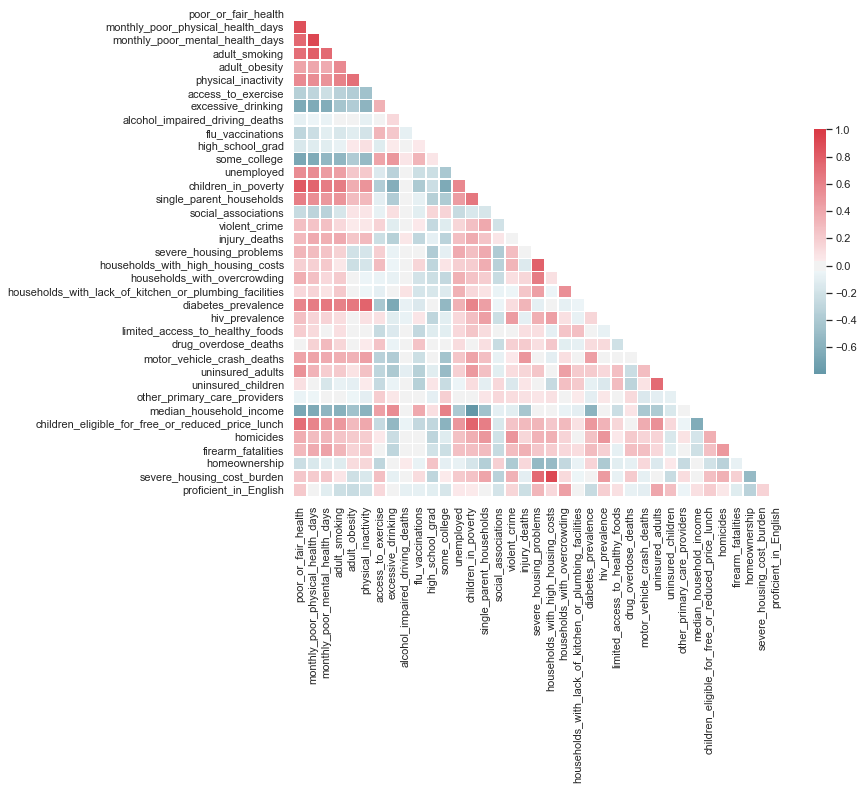

In [165]:
sns.set(style="white")


# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [166]:
len(X_train.columns)

37

In [167]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
X_train.drop(columns=to_drop, inplace=False)
X_test.drop(columns=to_drop, inplace=False)

poor_or_fair_health  monthly_poor_physical_health_days  adult_smoking  \
0               2.481885                           1.291657       1.498848   
1              -0.575477                          -0.070724      -0.979527   
2              -1.085898                          -1.362340      -0.943291   
3              -0.682865                          -0.572563      -0.617344   
4              -1.346057                          -2.014137       0.128104   
..                   ...                                ...            ...   
634            -0.140635                          -0.248402      -0.180596   
635            -1.130083                          -0.772632      -0.246501   
636            -1.264452                          -1.008077      -1.673170   
637             0.326568                           0.348331       0.573952   
638             1.818427                           1.052888       1.105447   

     adult_obesity  physical_inactivity  access_to_exercise  \
0         2.109552             1.255570            0.407362   
1        -0.698610            -0.800369            0.994586   
2        -0.023780             0.852068           -2.611250   
3         0.977580            -0.627439           -0.953935   
4         0.150369            -1.050155            0.568632   
..             ...                  ...                 ...   
634      -0.045549            -0.281580           -0.420192   
635      -0.546229            -1.396014            0.604936   
636      -2.548948            -1.837945            0.696858   
637       0.259213            -0.012579           -0.470233   
638       0.302750             0.909711            0.605639   

     excessive_drinking  alcohol_impaired_driving_deaths  flu_vaccinations  \
0             -2.247876                        -1.216632         -0.562466   
1              1.381445                         0.173272         -0.153085   
2             -0.558164                        -1.962435         -0.562466   
3              1.402618                        -0.196060          0.870369   
4              2.695487                         0.674510          0.563333   
..                  ...                              ...               ...   
634            0.333042                        -1.459018         -0.357775   
635            0.749988                         0.893830          0.256297   
636            0.506842                         0.458367          0.563333   
637           -0.701782                        -0.211420          0.153951   
638           -1.369101                        -1.370180         -0.153085   

     high_school_grad  some_college  unemployed  children_in_poverty  \
0           -2.013717     -0.033238    1.605949             3.222498   
1            0.240795      1.799755   -0.448239            -0.383179   
2            1.623488      0.931917   -0.730001            -0.717038   
3           -0.525913     -0.369064   -0.466063            -0.271893   
4           -0.203329      0.602144   -1.152599            -1.451528   
..                ...           ...         ...                  ...   
634          1.096299     -1.420370    1.673849             0.763070   
635          0.159340      0.769782   -1.207051            -1.062026   
636         -5.317386      1.249727   -0.304243            -0.783810   
637         -0.053517     -0.255723    0.624421             0.418083   
638         -0.622817      0.126388    0.888183             2.232050   

     single_parent_households  social_associations  violent_crime  \
0                    3.704463            -0.578509      -1.219660   
1                    0.674807            -0.005582       2.542317   
2                   -1.679031             5.984088      -0.160747   
3                   -0.156326            -0.535775      -1.050630   
4                   -1.413054            -0.167524      -0.449500   
..                        ...                  ...            ...   
634                 -0.404

In [168]:
to_drop

['monthly_poor_mental_health_days', 'severe_housing_cost_burden']

# Variance Inflation Factor (VIF)

In [169]:
#Measure of the colinearity among predictor variables within the multiple regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

[12.785248635952124,
 19.18619713344922,
 9.95042366003272,
 5.192435863286215,
 2.8026377754280416,
 3.6860297634236674,
 1.885884953419171,
 2.9394452782560583,
 1.081427990115503,
 1.6056619846827558,
 1.405908680191059,
 3.0410802045127046,
 2.155580606063705,
 7.666643913985022,
 2.904134457635536,
 1.7165616917090118,
 1.6885532981261617,
 2.2111827126771026,
 42.482145627195145,
 25.009476576302255,
 9.229636328507988,
 4.966127526643538,
 4.7178522303881865,
 2.02878592982398,
 1.4366355271583127,
 1.7388024103906055,
 1.8411610692790699,
 5.537560867870831,
 3.9523952329876186,
 1.256940546482101,
 4.664706454634928,
 3.421348306993359,
 2.2480936383533194,
 1.8074133092225797,
 2.3548190212236895,
 6.807481820206254,
 3.0927684764399785]

In [170]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]
vif["features"] = df_features.columns
vif.round(1)

VIF Factor                                           features
0        195.6                                poor_or_fair_health
1        608.1                  monthly_poor_physical_health_days
2        412.3                    monthly_poor_mental_health_days
3        130.5                                      adult_smoking
4        129.1                                      adult_obesity
5         90.9                                physical_inactivity
6         15.6                                 access_to_exercise
7         73.9                                 excessive_drinking
8          5.2                    alcohol_impaired_driving_deaths
9         29.3                                   flu_vaccinations
10       172.9                                   high_school_grad
11        64.3                                       some_college
12        18.2                                         unemployed
13        47.7                                children_in_poverty
14        31.1                           single_parent_households
15         8.1                                social_associations
16         4.2                                      violent_crime
17        21.2                                      injury_deaths
18       453.8                            severe_housing_problems
19       262.1                 households_with_high_housing_costs
20        19.1                       households_with_overcrowding
21         7.7  households_with_lack_of_kitchen_or_plumbing_fa...
22        98.6                                diabetes_prevalence
23         3.1                                     hiv_prevalence
24         2.9                    limited_access_to_healthy_foods
25         3.6                               drug_overdose_deaths
26         6.5                         motor_vehicle_crash_deaths
27        31.8                                   uninsured_adults
28        17.0                                 uninsured_children
29         3.5                       other_primary_care_providers
30        61.7                            median_household_income
31        33.0  children_eligible_for_free_or_reduced_price_lunch
32         3.5                                          homicides
33         5.0                                 firearm_fatalities
34       141.8                                      homeownership
35        72.7                         severe_housing_cost_burden
36         4.1                              proficient_in_English

In [171]:
df_features.corrwith(target).abs()

poor_or_fair_health                                       0.630286
monthly_poor_physical_health_days                         0.661106
monthly_poor_mental_health_days                           0.625429
adult_smoking                                             0.692506
adult_obesity                                             0.540662
physical_inactivity                                       0.625907
access_to_exercise                                        0.348994
excessive_drinking                                        0.538908
alcohol_impaired_driving_deaths                           0.049231
flu_vaccinations                                          0.217413
high_school_grad                                          0.068207
some_college                                              0.523738
unemployed                                                0.401205
children_in_poverty                                       0.644267
single_parent_households                                  0.49

# F Test

F Test to compare between models and check if differences are significant
F-Test useful in feature selection to know the significance of each feature to improve the model.

In [172]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_features, target, random_state=25,test_size=0.2)
selector = SelectKBest(f_regression, k=15)
selector.fit(X_train3, y_train3)

SelectKBest(k=15, score_func=<function f_regression at 0x7fe76e1467a0>)

In [173]:
selected_columns = X_train3.columns[selector.get_support()]
removed_columns = X_train3.columns[~selector.get_support()]
# X_train = X_train3[selected_columns]
# X_test = X_test3[selected_columns]

In [174]:
list(removed_columns)

['access_to_exercise',
 'alcohol_impaired_driving_deaths',
 'flu_vaccinations',
 'high_school_grad',
 'unemployed',
 'social_associations',
 'violent_crime',
 'severe_housing_problems',
 'households_with_high_housing_costs',
 'households_with_overcrowding',
 'households_with_lack_of_kitchen_or_plumbing_facilities',
 'hiv_prevalence',
 'limited_access_to_healthy_foods',
 'drug_overdose_deaths',
 'uninsured_adults',
 'uninsured_children',
 'other_primary_care_providers',
 'homicides',
 'firearm_fatalities',
 'homeownership',
 'severe_housing_cost_burden',
 'proficient_in_English']

In [175]:
list(selected_columns)

['poor_or_fair_health',
 'monthly_poor_physical_health_days',
 'monthly_poor_mental_health_days',
 'adult_smoking',
 'adult_obesity',
 'physical_inactivity',
 'excessive_drinking',
 'some_college',
 'children_in_poverty',
 'single_parent_households',
 'injury_deaths',
 'diabetes_prevalence',
 'motor_vehicle_crash_deaths',
 'median_household_income',
 'children_eligible_for_free_or_reduced_price_lunch']

In [176]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train3[selected_columns], y_train3)

y_train_kbest = lm_kbest.predict(X_train3[selected_columns])

train3_rmse = np.sqrt(metrics.mean_squared_error(y_train3, y_train_kbest))

print('Training Root Mean Squared Error:' , train3_rmse)

y_kbest = lm_kbest.predict(X_test3[selected_columns])

test3_rmse = np.sqrt(metrics.mean_squared_error(y_test3, y_kbest))

print('Testing Root Mean Squared Error:' , test3_rmse)

Training Root Mean Squared Error: 1.68099129161024
Testing Root Mean Squared Error: 1.7207811862491273


# Recursive & Polynomial

Recursive eliminates least explaining features until best subset of features are known.

In [177]:
df_poly2.shape

(3193, 740)

In [178]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(df_poly2, target, random_state=25,test_size=0.2)

In [179]:
from sklearn.feature_selection import RFECV

lm4 = linear_model.LinearRegression()

In [180]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=lm4, step=1, cv=10, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train4, y_train4)

RFECV(cv=10,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [181]:
selected_rfe = X_train4.columns[selector.support_]
removed_rfe = X_train4.columns[~selector.support_]

In [182]:
list(removed_rfe)

['poor_or_fair_health',
 'monthly_poor_physical_health_days',
 'monthly_poor_mental_health_days',
 'adult_smoking',
 'adult_obesity',
 'physical_inactivity',
 'access_to_exercise',
 'excessive_drinking',
 'alcohol_impaired_driving_deaths',
 'flu_vaccinations',
 'high_school_grad',
 'some_college',
 'unemployed',
 'children_in_poverty',
 'single_parent_households',
 'social_associations',
 'violent_crime',
 'injury_deaths',
 'severe_housing_problems',
 'households_with_high_housing_costs',
 'households_with_overcrowding',
 'households_with_lack_of_kitchen_or_plumbing_facilities',
 'diabetes_prevalence',
 'hiv_prevalence',
 'limited_access_to_healthy_foods',
 'drug_overdose_deaths',
 'motor_vehicle_crash_deaths',
 'uninsured_adults',
 'uninsured_children',
 'median_household_income',
 'children_eligible_for_free_or_reduced_price_lunch',
 'homicides',
 'firearm_fatalities',
 'homeownership',
 'severe_housing_cost_burden',
 'proficient_in_English',
 'poor_or_fair_health^2',
 'poor_or_fair_

In [183]:
list(selected_rfe)

['other_primary_care_providers',
 'poor_or_fair_health severe_housing_problems',
 'poor_or_fair_health households_with_high_housing_costs',
 'poor_or_fair_health other_primary_care_providers',
 'poor_or_fair_health severe_housing_cost_burden',
 'adult_smoking unemployed',
 'adult_smoking diabetes_prevalence',
 'adult_smoking other_primary_care_providers',
 'adult_obesity other_primary_care_providers',
 'physical_inactivity unemployed',
 'physical_inactivity other_primary_care_providers',
 'excessive_drinking other_primary_care_providers',
 'some_college other_primary_care_providers',
 'unemployed severe_housing_problems',
 'unemployed households_with_overcrowding',
 'unemployed households_with_lack_of_kitchen_or_plumbing_facilities',
 'unemployed diabetes_prevalence',
 'unemployed uninsured_adults',
 'unemployed other_primary_care_providers',
 'unemployed proficient_in_English',
 'children_in_poverty severe_housing_problems',
 'children_in_poverty households_with_overcrowding',
 'child

In [184]:
#instantiate a linear regression object
lm4_rfe = LinearRegression()

#fit the linear regression to the data
lm4_rfe = lm4_rfe.fit(X_train4[selected_rfe], y_train4)

y_rfe = lm4_rfe.predict(X_train4[selected_rfe])

train4_rmse = np.sqrt(metrics.mean_squared_error(y_train4, y_rfe))

print('Training Root Mean Squared Error:' , train4_rmse)

y_pred_rfe = lm4_rfe.predict(X_test4[selected_rfe])

test4_rmse = np.sqrt(metrics.mean_squared_error(y_test4, y_pred_rfe))

print('Testing Root Mean Squared Error:' , test4_rmse)

Training Root Mean Squared Error: 1.6556114118543859
Testing Root Mean Squared Error: 1.9505313413421144


# Lasso & Polynomial

Least Absolute Shrinkage and Selection Operator: data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters)

In [280]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(df_poly2, target, random_state=25,test_size=0.2)

In [281]:
lm5_rfe = LinearRegression()
selected_rfe2 = X_train5.columns[selector.support_]
lm5_rfe = lm5_rfe.fit(X_train5[selected_rfe2], y_train5)

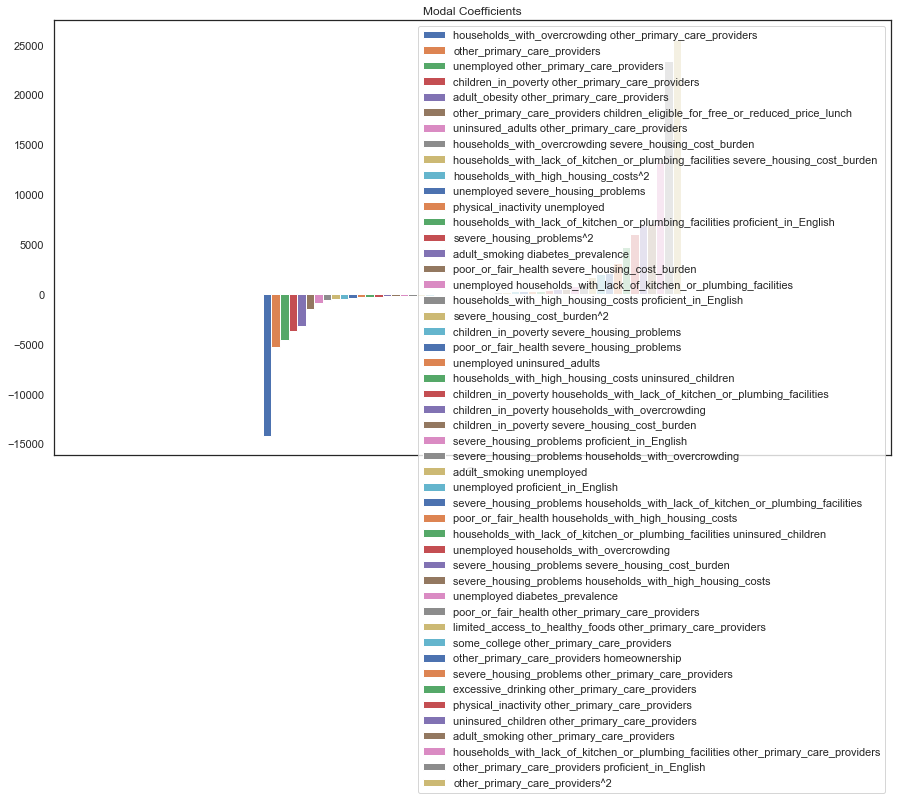

In [332]:
coef = pd.DataFrame(data=lm5_rfe.coef_ ).T
coef.columns = selected_rfe2

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(15,8),)
plt.savefig('lasso_fig.png')

In [283]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train5,y_train5)

y_train_pred5 = lasso.predict(X_train5)
y_pred5 = lasso.predict(X_test5)

train5_rmse = metrics.mean_absolute_error(y_train5, y_train_pred5)
test5_rmse = np.sqrt(metrics.mean_squared_error(y_test5, y_pred5))
print('Training Error: '+ str(train5_rmse) )
print('Testing Error: '+ str(test5_rmse) )

Training Error: 0.9821584967157915
Testing Error: 1.724875131662724


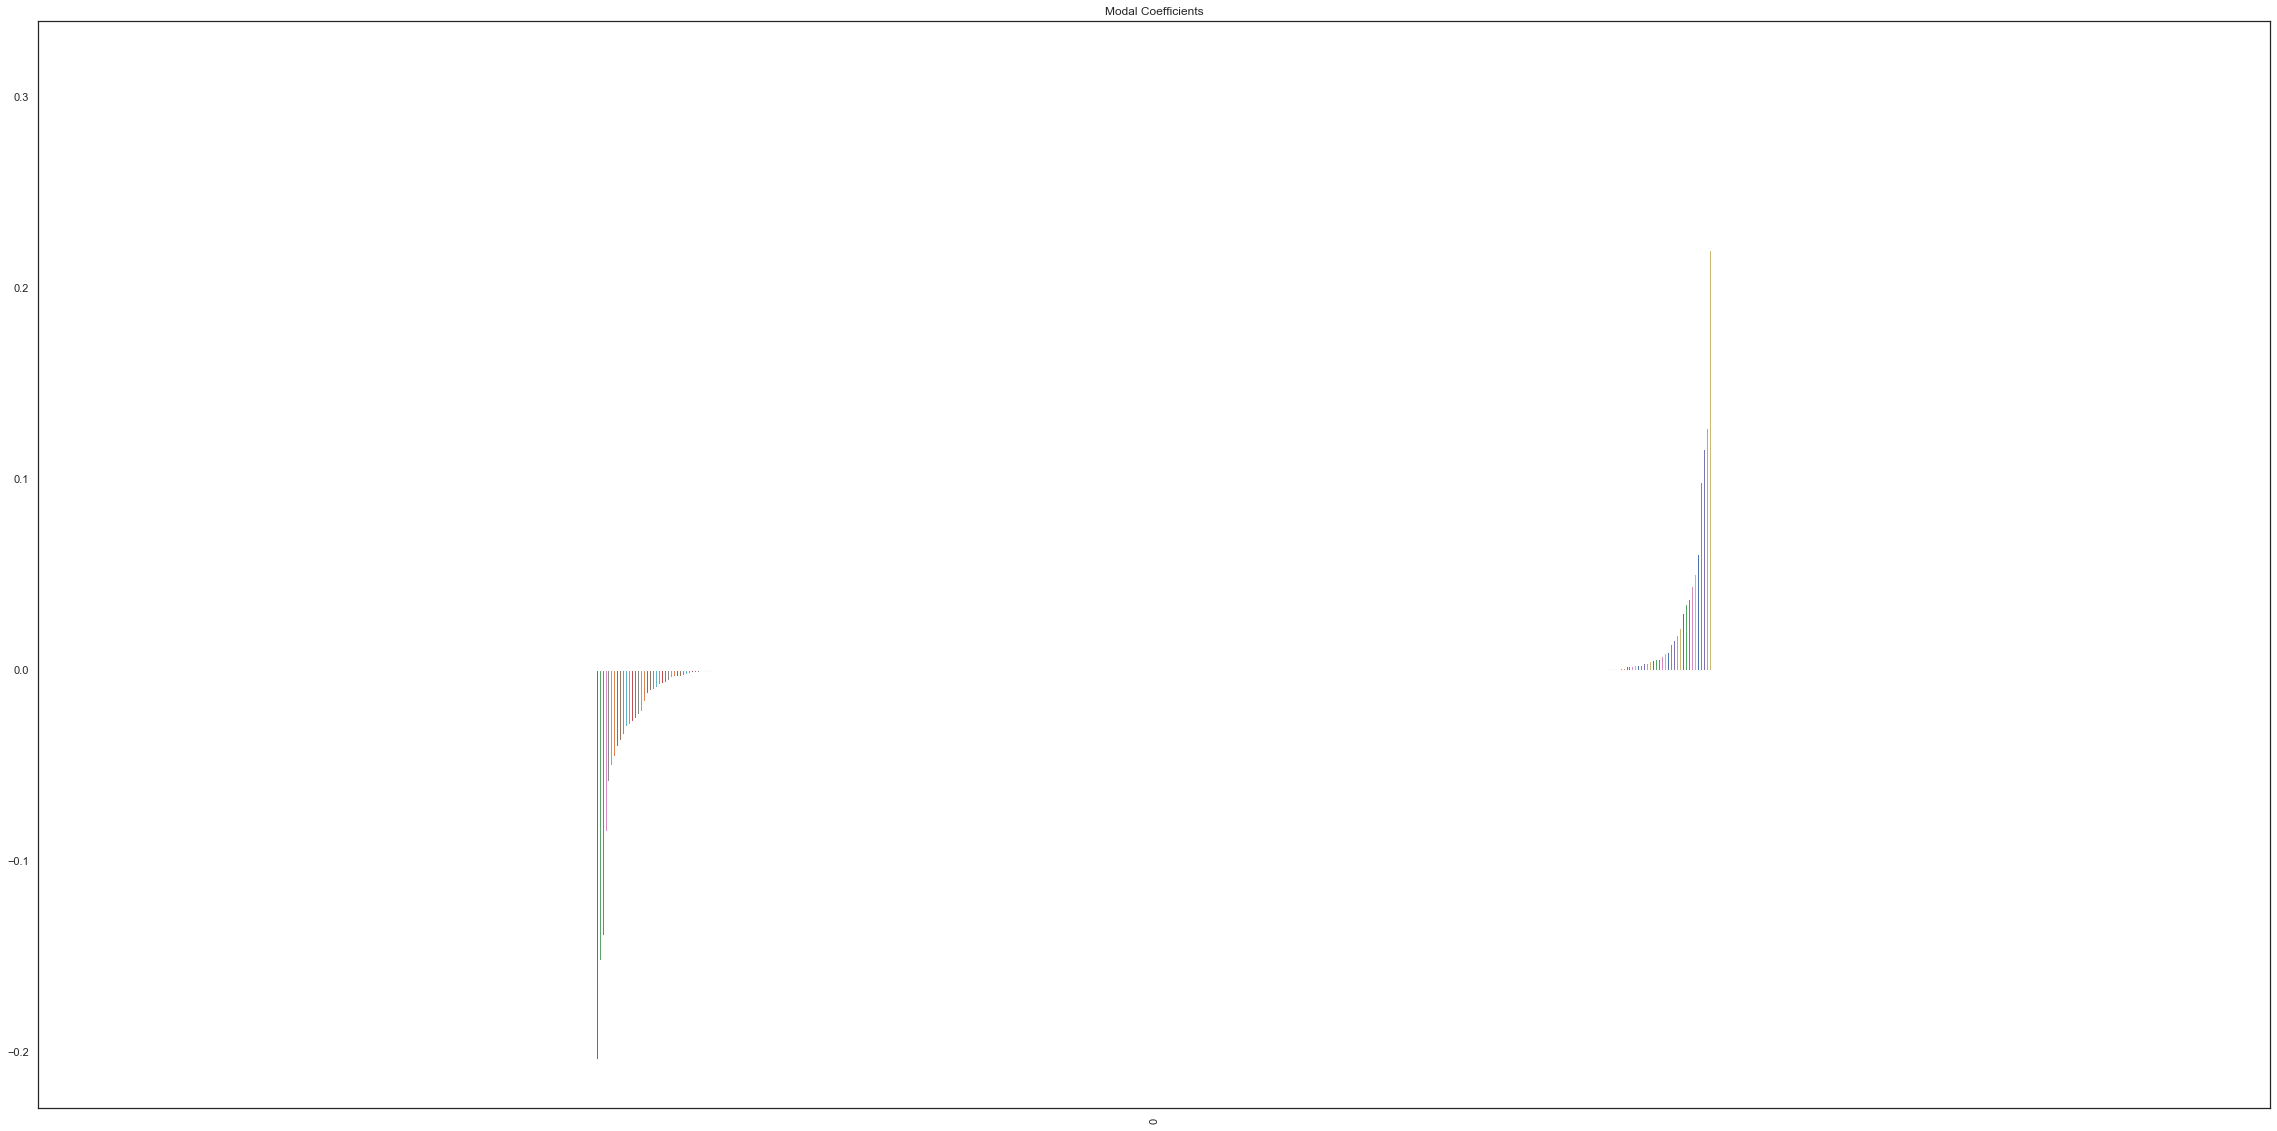

In [284]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train5.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(40,20))

In [285]:
## training the model
from sklearn.linear_model import Lasso

lasso1 = Lasso(alpha=.1, normalize=False)

lasso1.fit(X_train5,y_train5)

y_train_lasso1 = lasso1.predict(X_train5)
y_pred_lasso1 = lasso1.predict(X_test5)

train5_rmse_lasso1 = metrics.mean_absolute_error(y_train5, y_train_lasso1)
test5_rmse_lasso1 = np.sqrt(metrics.mean_squared_error(y_test5, y_pred_lasso1))
print('Training Error: '+ str(train5_rmse_lasso1) )
print('Testing Error: '+ str(test5_rmse_lasso1) )

Training Error: 1.013250246782096
Testing Error: 1.6516859432780284


# K-Fold Cross Validation
K-Fold cross validation test, we can see that the negative mean squared error is not far off from each other.

In [264]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(lm_log, df_features, target, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(lm_log, df_features, target, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(lm_log, df_features, target, cv=20, scoring='neg_mean_squared_error'))

In [262]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-3.080203178487402
-2.974862489561267
-2.7540603238673924


# Results

In [191]:
# Test Results
print('#1 Original Training Error: ', train_rmse, '#1 Original Testing Error: ', test_rmse)
print('#2 Poly Training Error: ', train2_rmse, '#2 Poly Testing Error: ', test2_rmse)
print('#3 F-Test Training Error: ', train3_rmse, '#3 F-Test Testing Error: ', test3_rmse)
print('#4 Recursive Training Error: ', train4_rmse, '#4 Recursive Testing Error: ', test4_rmse)
print('#5 Lasso Training Error: ', train5_rmse_lasso1, '#5 Lasso Testing Error: ', test5_rmse_lasso1)

#1 Original Training Error:  1.5740083080327474 #1 Original Testing Error:  1.636546615939479
#2 Poly Training Error:  1.0298128498262626 #2 Poly Testing Error:  2.0133305119976903
#3 F-Test Training Error:  1.68099129161024 #3 F-Test Testing Error:  1.7207811862491273
#4 Recursive Training Error:  1.6556114118543859 #4 Recursive Testing Error:  1.9505313413421144
#5 Lasso Training Error:  1.013250246782096 #5 Lasso Testing Error:  1.6516859432780284


In [311]:
#Standardized RMSE to see error relative to the data 
print('Root Mean Squared Error Z-score:' , test5_rmse_lasso1/target.std())

Root Mean Squared Error Z-score: 0.5586994655577765


# Conclusion
* Lasso test most successful
* RMSE error Z Score of 0.5586994655577765
* Able to predict life expectancy within 1 standard deviation of population mean

# Recommendations
* Work with state legislators to allocate resources to improve health/socioeconomic factors
* Work with insurance companies to base premiums for the following year based off of county breakdown

# Future work
* Focus on specific counties within states with lowest mean life expectancy and create model to see if it is in line with the original.
* Separate out the categories (Health Behaviors, Clinical Care Access, Socioeconomic Factors, Physical Environment) to establish true value on life expectancy. 
* From influx of money from "defund the police" allocate resources accordingly.
